# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
from TRAIN.architecture.archeader import bert



Chosen class grouping: all-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/all-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/all-classes exists. Continuing with execution
device: mps
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/distilbert-base-uncased exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/prajjwal1/bert

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

import gc

In [ ]:
TRAIN_classes = 'all-classes'

base_data_config = {
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : -1,
  "label_col" : sup.class_numeric_column,
  "class_list" : TRAIN_classes,
  "batch_size" : 256,
}

base_train_config = {
  "arch" : sup.TRAIN_BERT_CODE,
  "device" : bert.device,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "loss_fn" : nn.CrossEntropyLoss,
}

base_num_epochs = 100

In [ ]:
configs = list()

for data_unit in [sup.DATA_S_PF, sup.DATA_S_PV]:
  for PH2 in [False, True]:
    for loadable in [bert.BERT_TINY, bert.DISTILBERT]:
    

      data_config = base_data_config.copy()
      train_config = base_train_config.copy()

      data_config["data_unit"] = data_unit
      if data_unit == sup.DATA_S_PF:
        data_config["seq_len"] = 1
        data_unit_multiplier = 1
      else:
        data_config["seq_len"] = 12
        data_unit_multiplier = 4

      data_config["PH2"] = PH2
      if PH2:
        data_config["input_dim"] = 75
      else:
        data_config["input_dim"] = 72

      train_config["loadable"] = loadable
      if loadable == bert.BERT_TINY:
        loadable_multiplier = 5
      else:
        loadable_multiplier = 1

      train_config["num_epochs"] = base_num_epochs \
                                    * data_unit_multiplier \
                                    * loadable_multiplier
      
      configs.append((data_config, train_config))



## Train

In [6]:
sup.bert_score_tracker = []

{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'class_list': 'alpha-classes', 'batch_size': 256, 'data_unit': 'Spf', 'seq_len': 1, 'PH2': False, 'input_dim': 72}
{'arch': 'BERT', 'device': device(type='mps'), 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'loadable': 'prajjwal1/bert-tiny', 'num_epochs': 500}


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


0.8728813559322034
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'class_list': 'alpha-classes', 'batch_size': 256, 'data_unit': 'Spf', 'seq_len': 1, 'PH2': False, 'input_dim': 72}
{'arch': 'BERT', 'device': device(type='mps'), 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'loadable': 'distilbert-base-uncased', 'num_epochs': 100}


0.9199152542372881
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spf/distilbert-base-uncased does not exist. Creating it and continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spf/distilbert-base-uncased does not exist. Creating it and continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'class_list': 'alpha-classes', 'batch_size': 256, 'data_unit': 'Spf', 'seq_len': 1, 'PH2': True, 'input_dim': 87}
{'arch': 'BERT', 'device': device(type='mps'), 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'loadable': 'prajjwal1/bert-tiny', 'num_epochs': 500}


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


0.7194915254237289
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spf/prajjwal1/bert-tiny exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'class_list': 'alpha-classes', 'batch_size': 256, 'data_unit': 'Spf', 'seq_len': 1, 'PH2': True, 'input_dim': 87}
{'arch': 'BERT', 'device': device(type='mps'), 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'loadable': 'distilbert-base-uncased', 'num_epochs': 100}


0.8487288135593221
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spf/distilbert-base-uncased exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spf/distilbert-base-uncased exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'class_list': 'alpha-classes', 'batch_size': 256, 'data_unit': 'Spv', 'seq_len': 12, 'PH2': False, 'input_dim': 72}
{'arch': 'BERT', 'device': device(type='mps'), 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'loadable': 'prajjwal1/bert-tiny', 'num_epochs': 5000}


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


0.8932203389830509
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'class_list': 'alpha-classes', 'batch_size': 256, 'data_unit': 'Spv', 'seq_len': 12, 'PH2': False, 'input_dim': 72}
{'arch': 'BERT', 'device': device(type='mps'), 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'loadable': 'distilbert-base-uncased', 'num_epochs': 1000}


0.923728813559322
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spv/distilbert-base-uncased does not exist. Creating it and continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spv/distilbert-base-uncased does not exist. Creating it and continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'class_list': 'alpha-classes', 'batch_size': 256, 'data_unit': 'Spv', 'seq_len': 12, 'PH2': True, 'input_dim': 87}
{'arch': 'BERT', 'device': device(type='mps'), 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'loadable': 'prajjwal1/bert-tiny', 'num_epochs': 5000}


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


0.7508474576271187
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spv/prajjwal1/bert-tiny exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'class_list': 'alpha-classes', 'batch_size': 256, 'data_unit': 'Spv', 'seq_len': 12, 'PH2': True, 'input_dim': 87}
{'arch': 'BERT', 'device': device(type='mps'), 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'loadable': 'distilbert-base-uncased', 'num_epochs': 1000}


0.7067796610169491
Directory /Users/diego/Desktop/iteso/TOG/bin/gen/TRAIN/alpha-classes/BERT/Spv/distilbert-base-uncased exists. Continuing with execution


/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:192: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/BERT/bert.py:197: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/alpha-classes/BERT/Spv/distilbert-base-uncased exists. Continuing with execution
clearing memory...


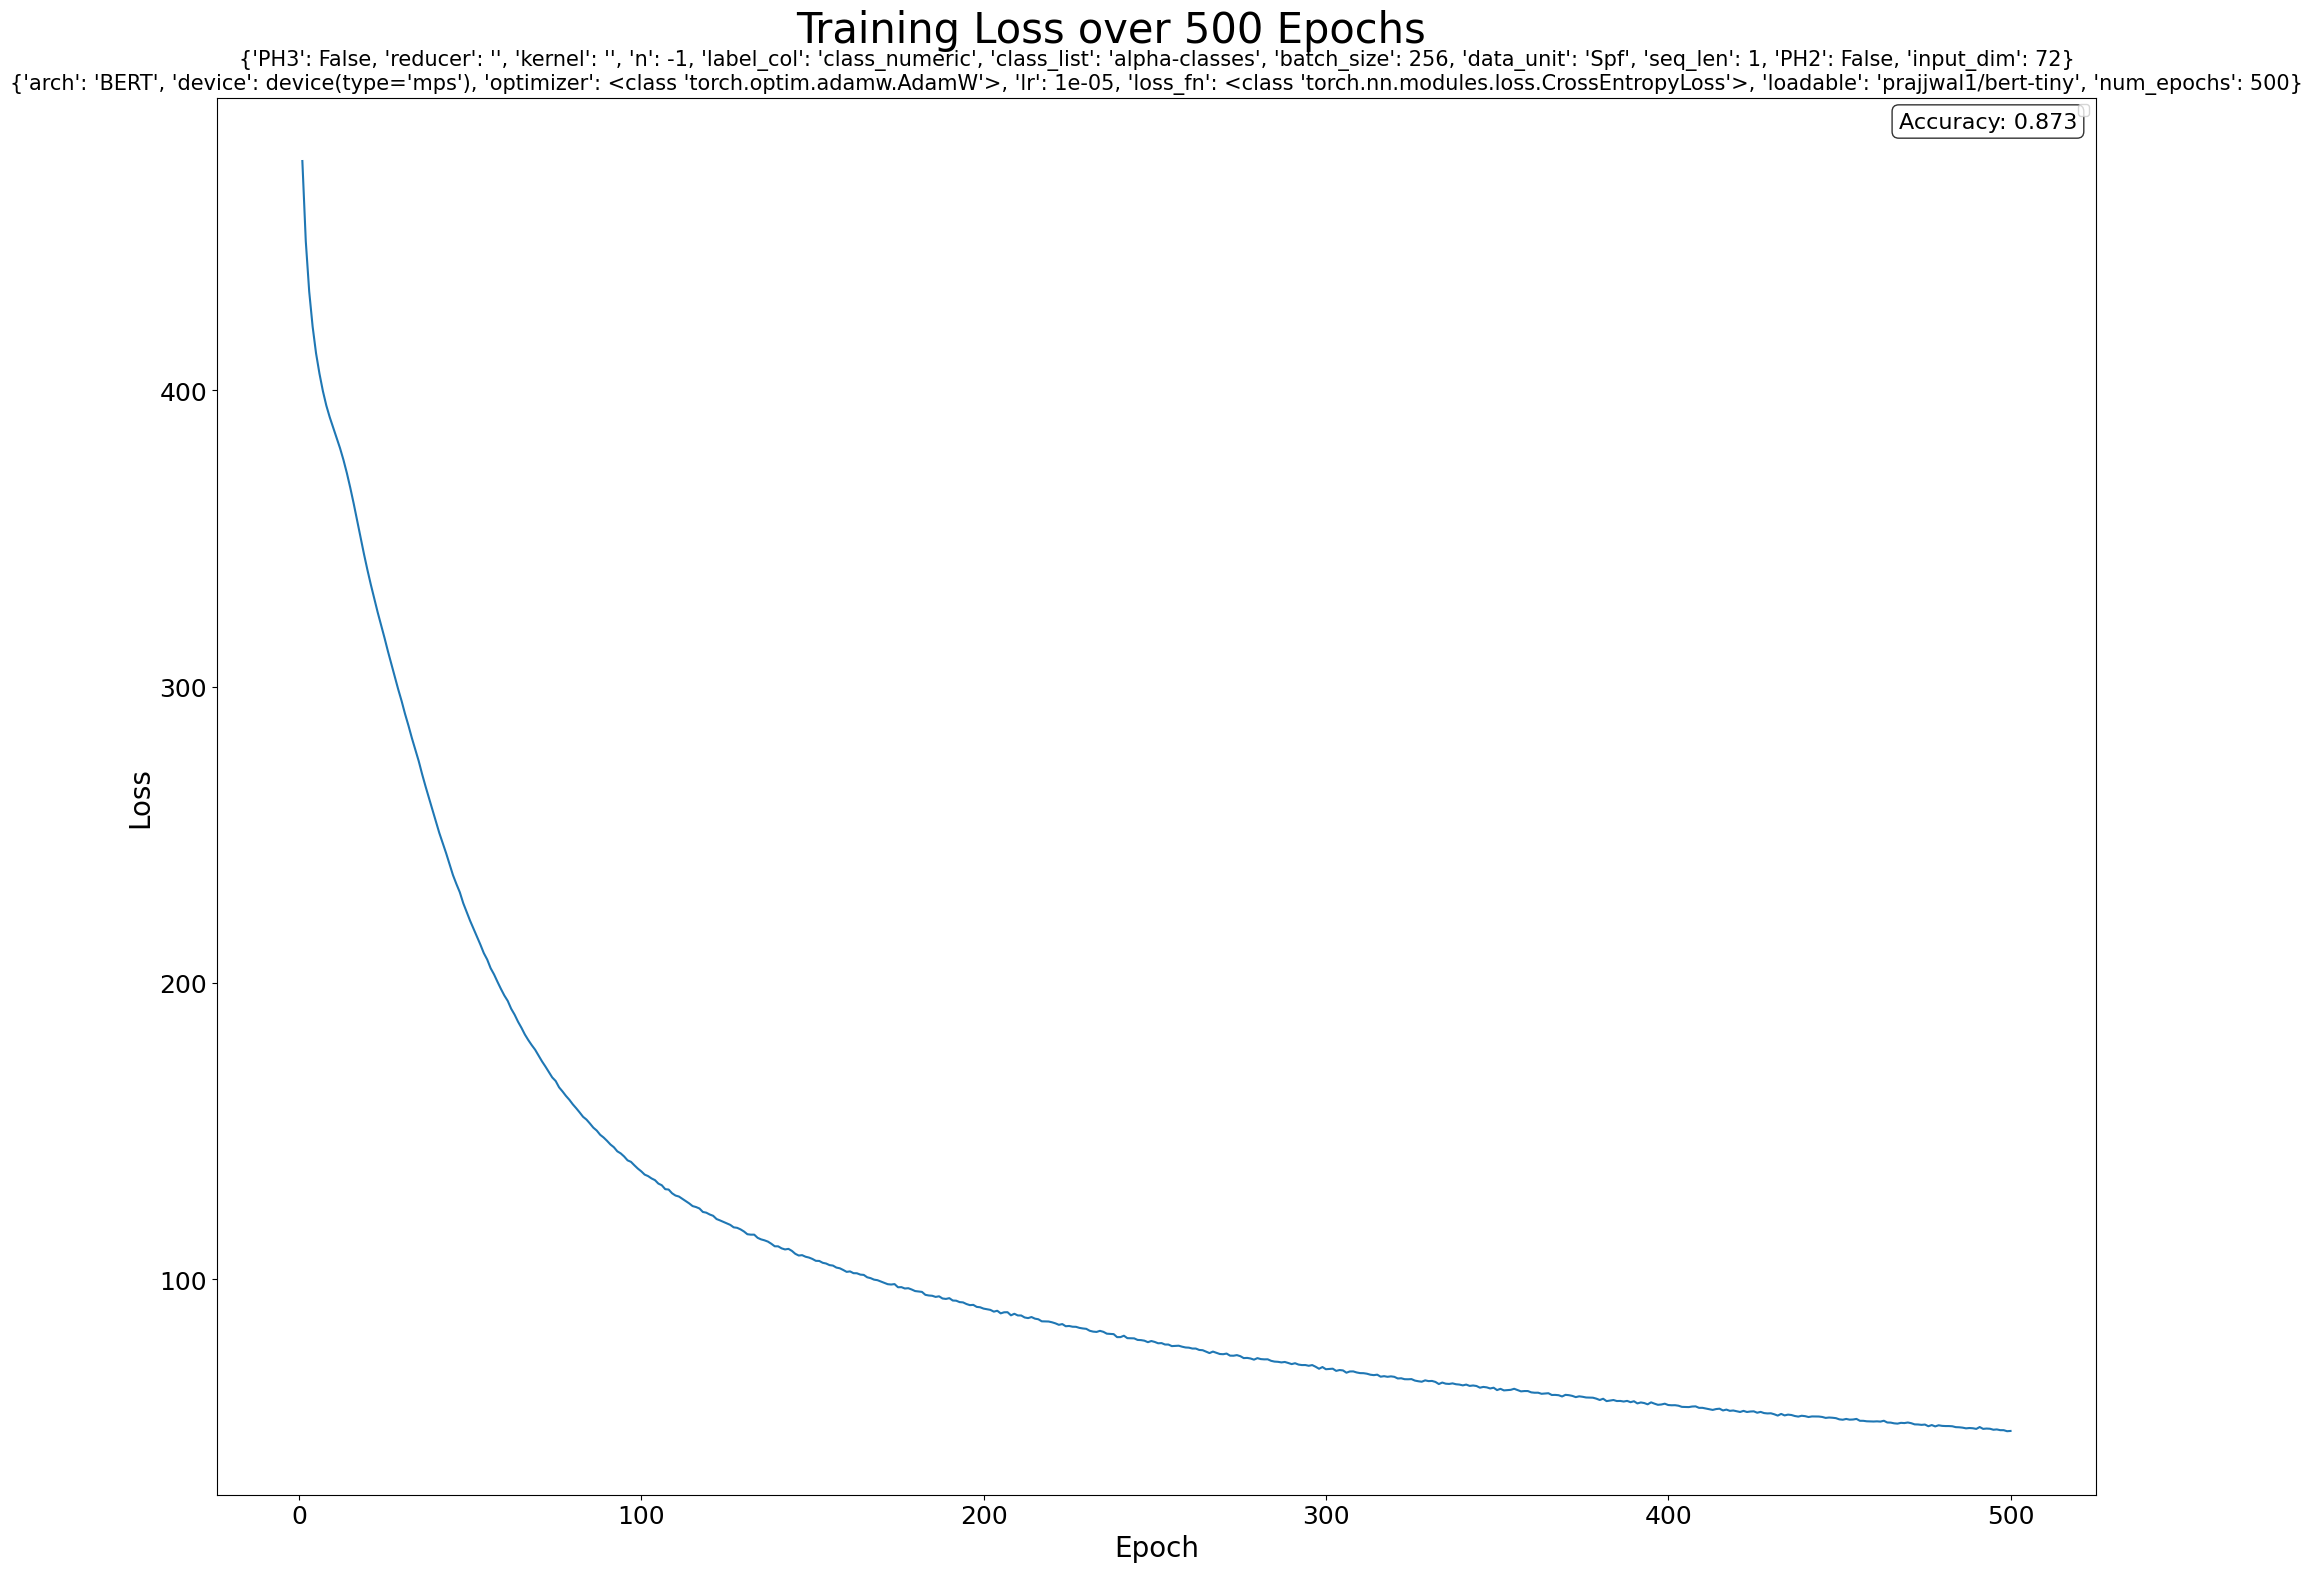

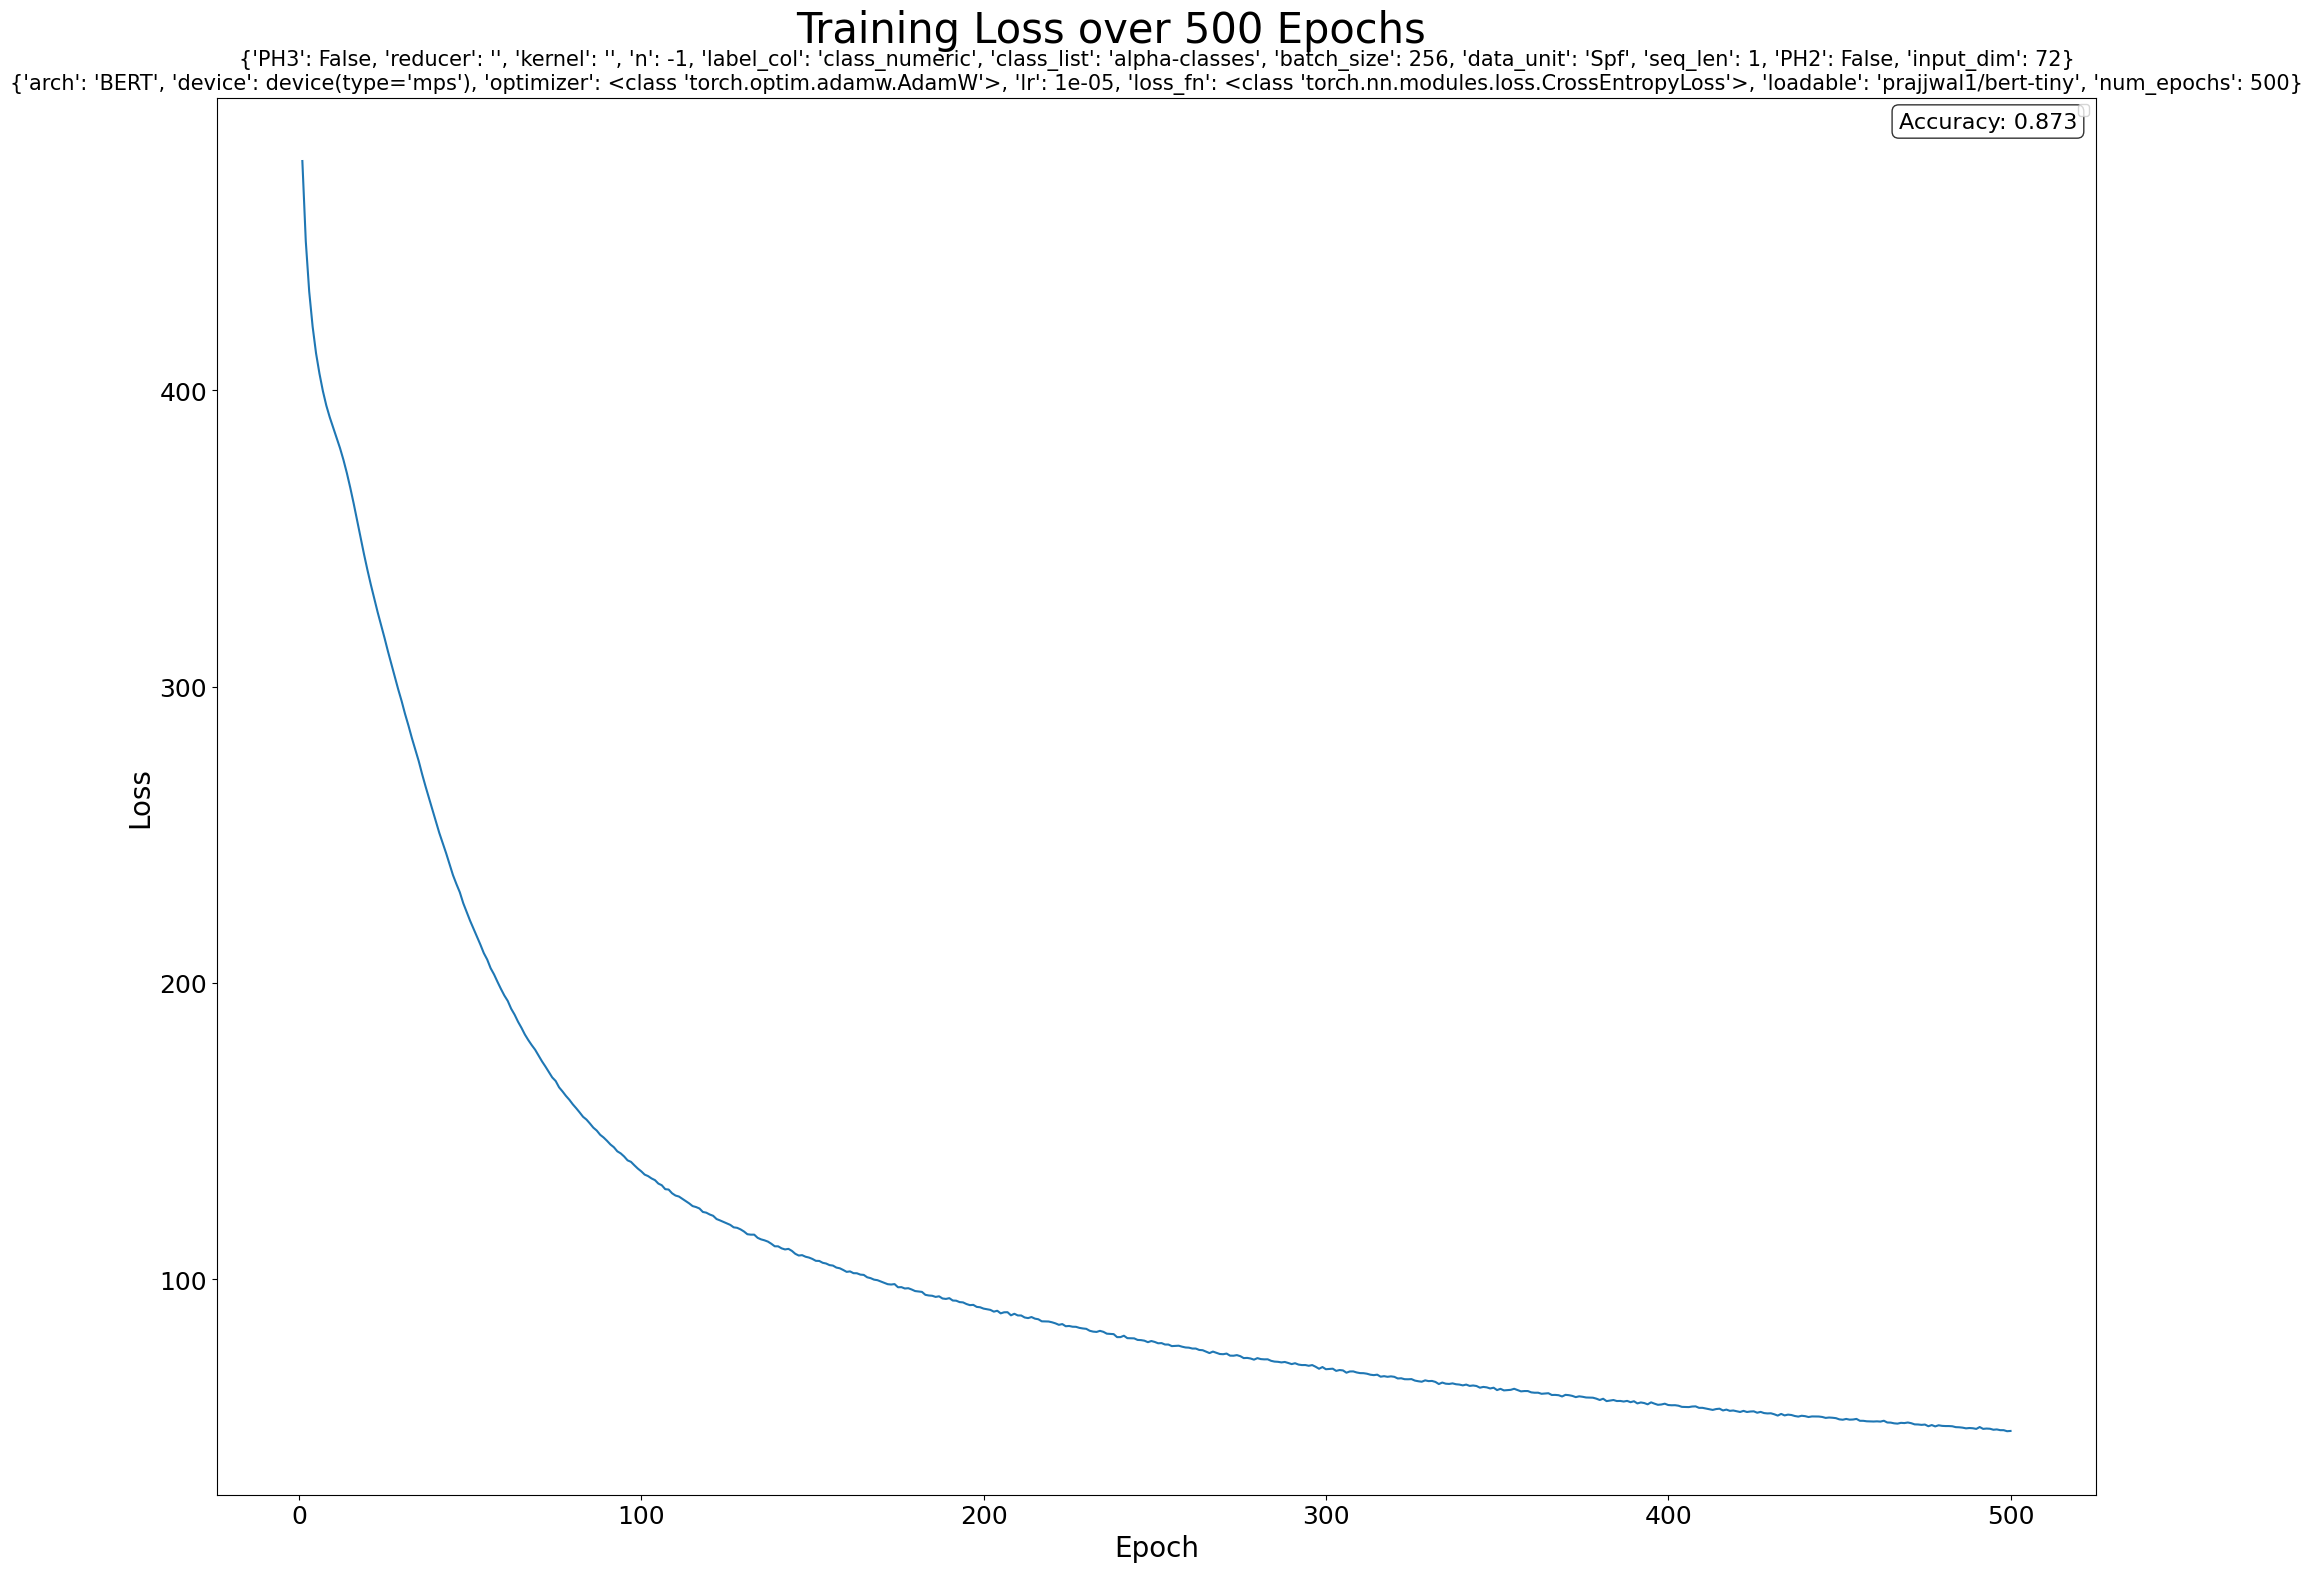

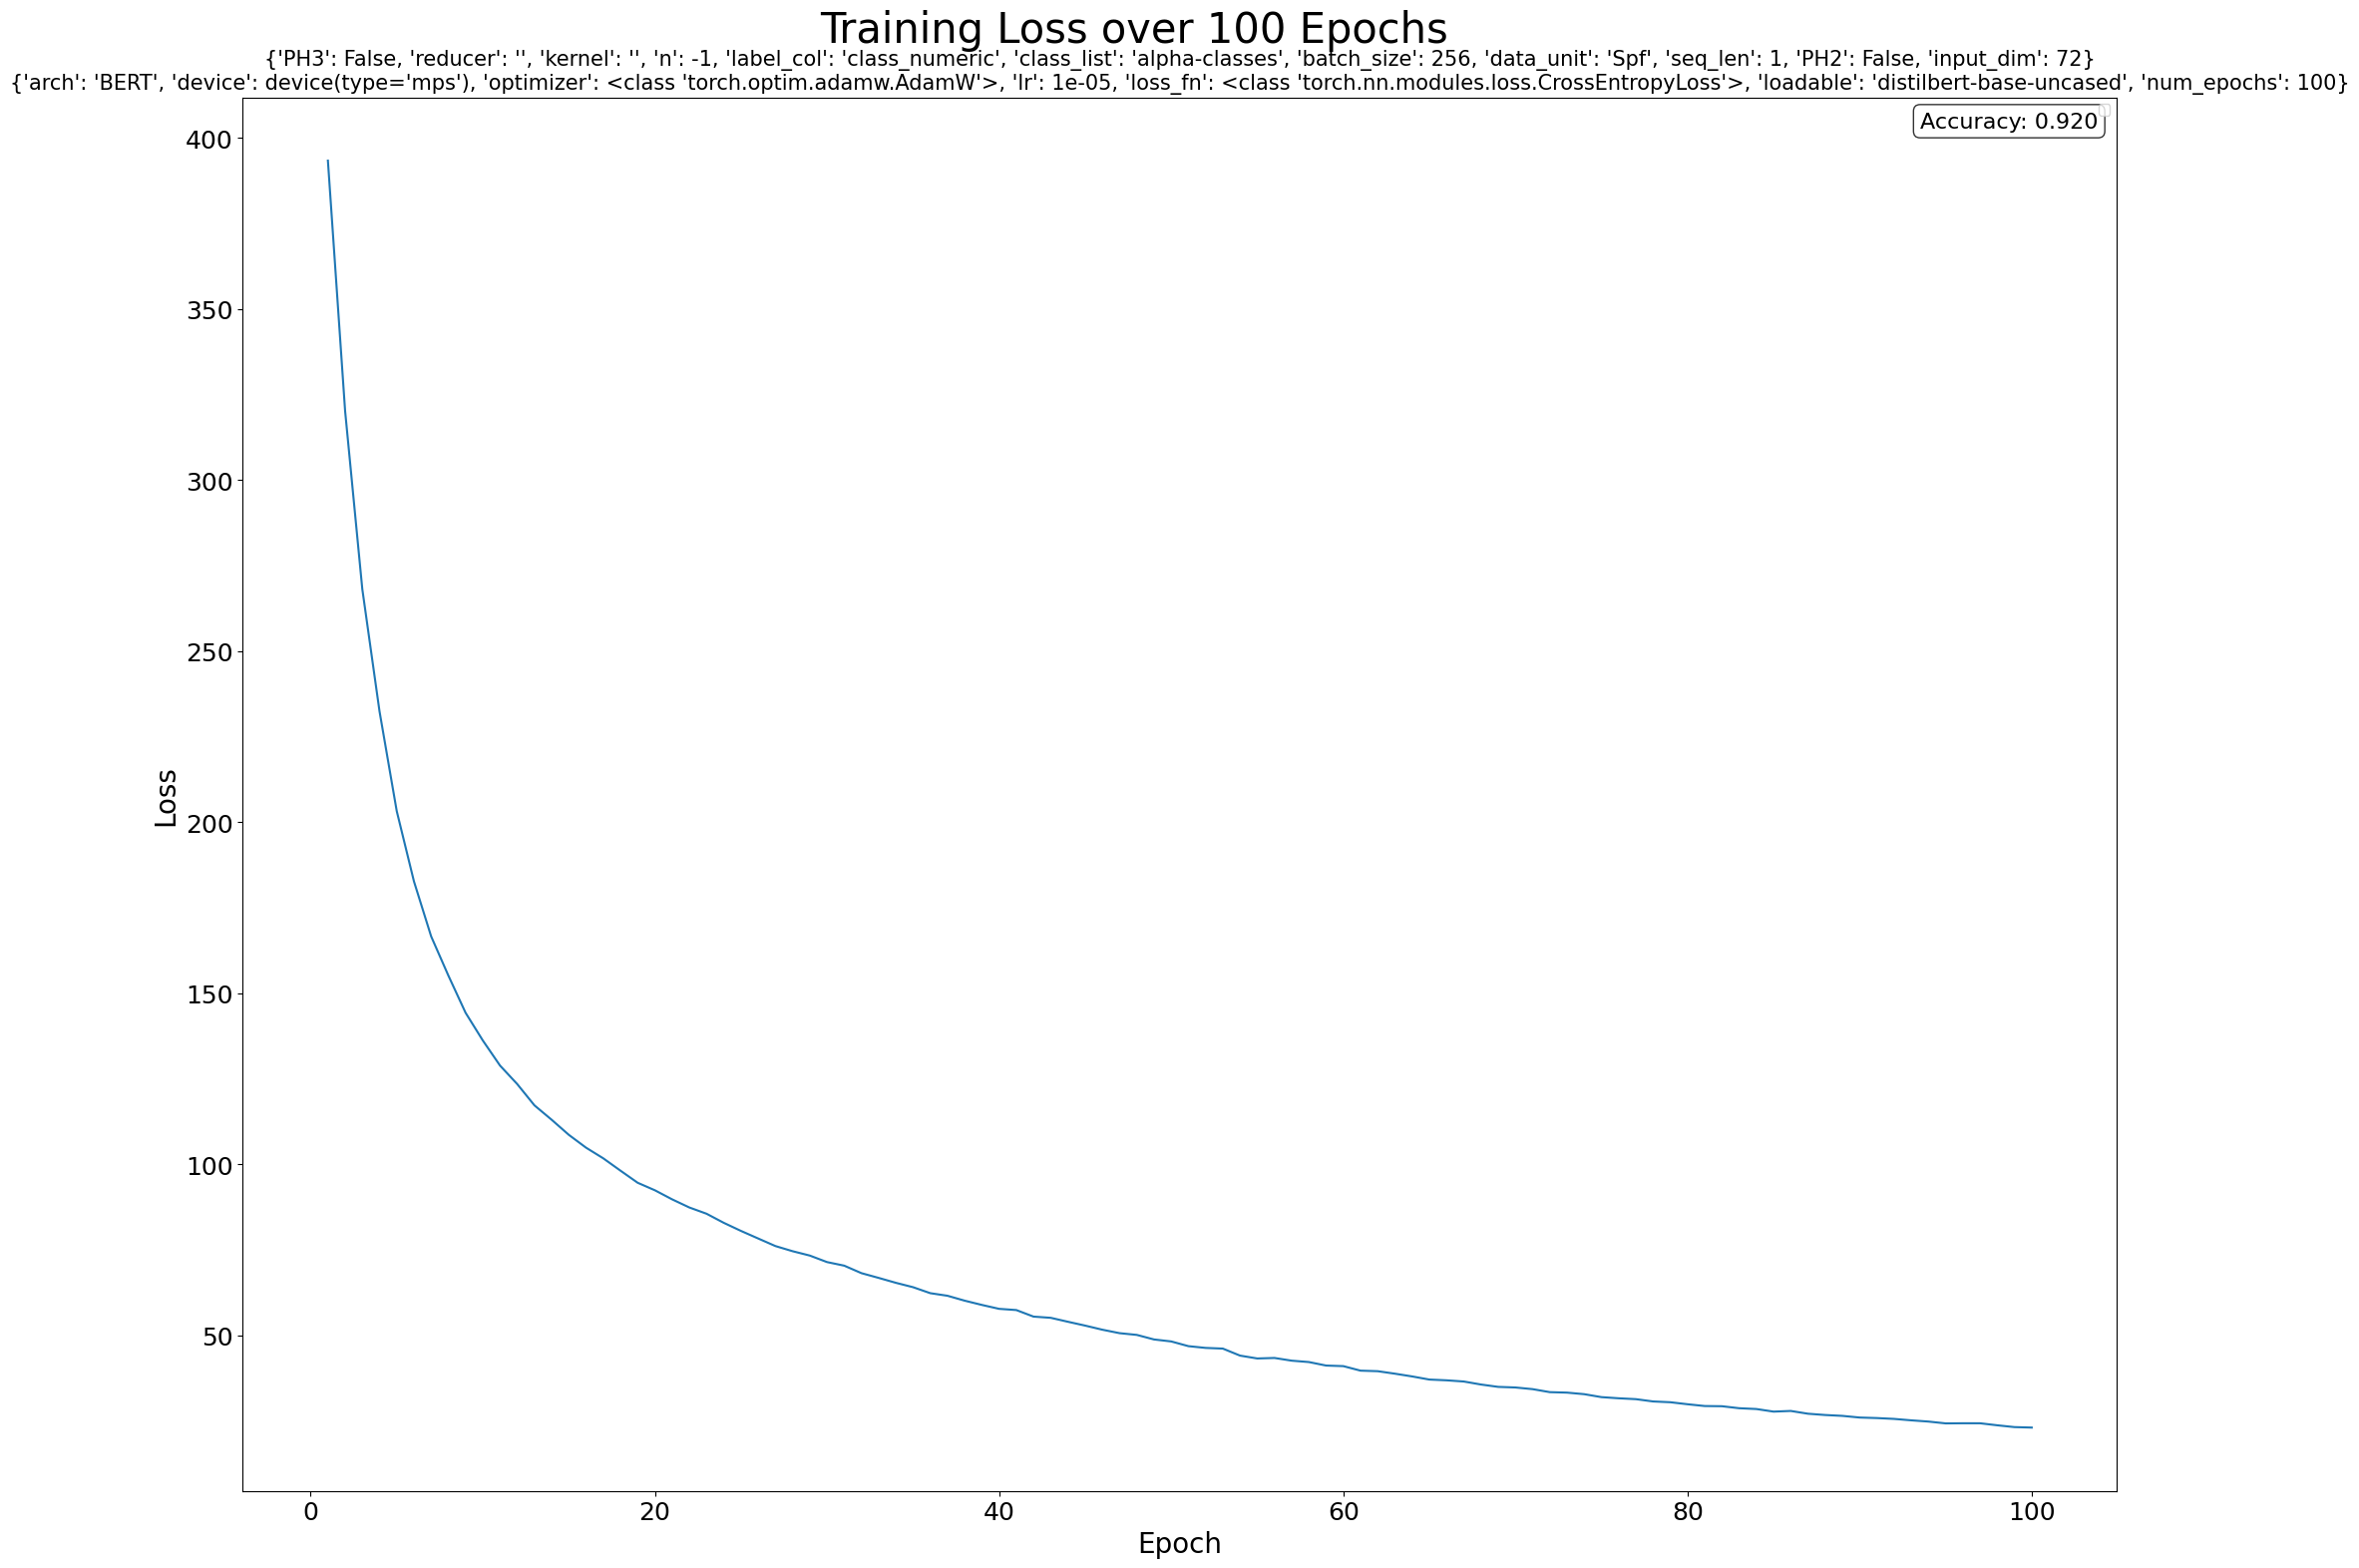

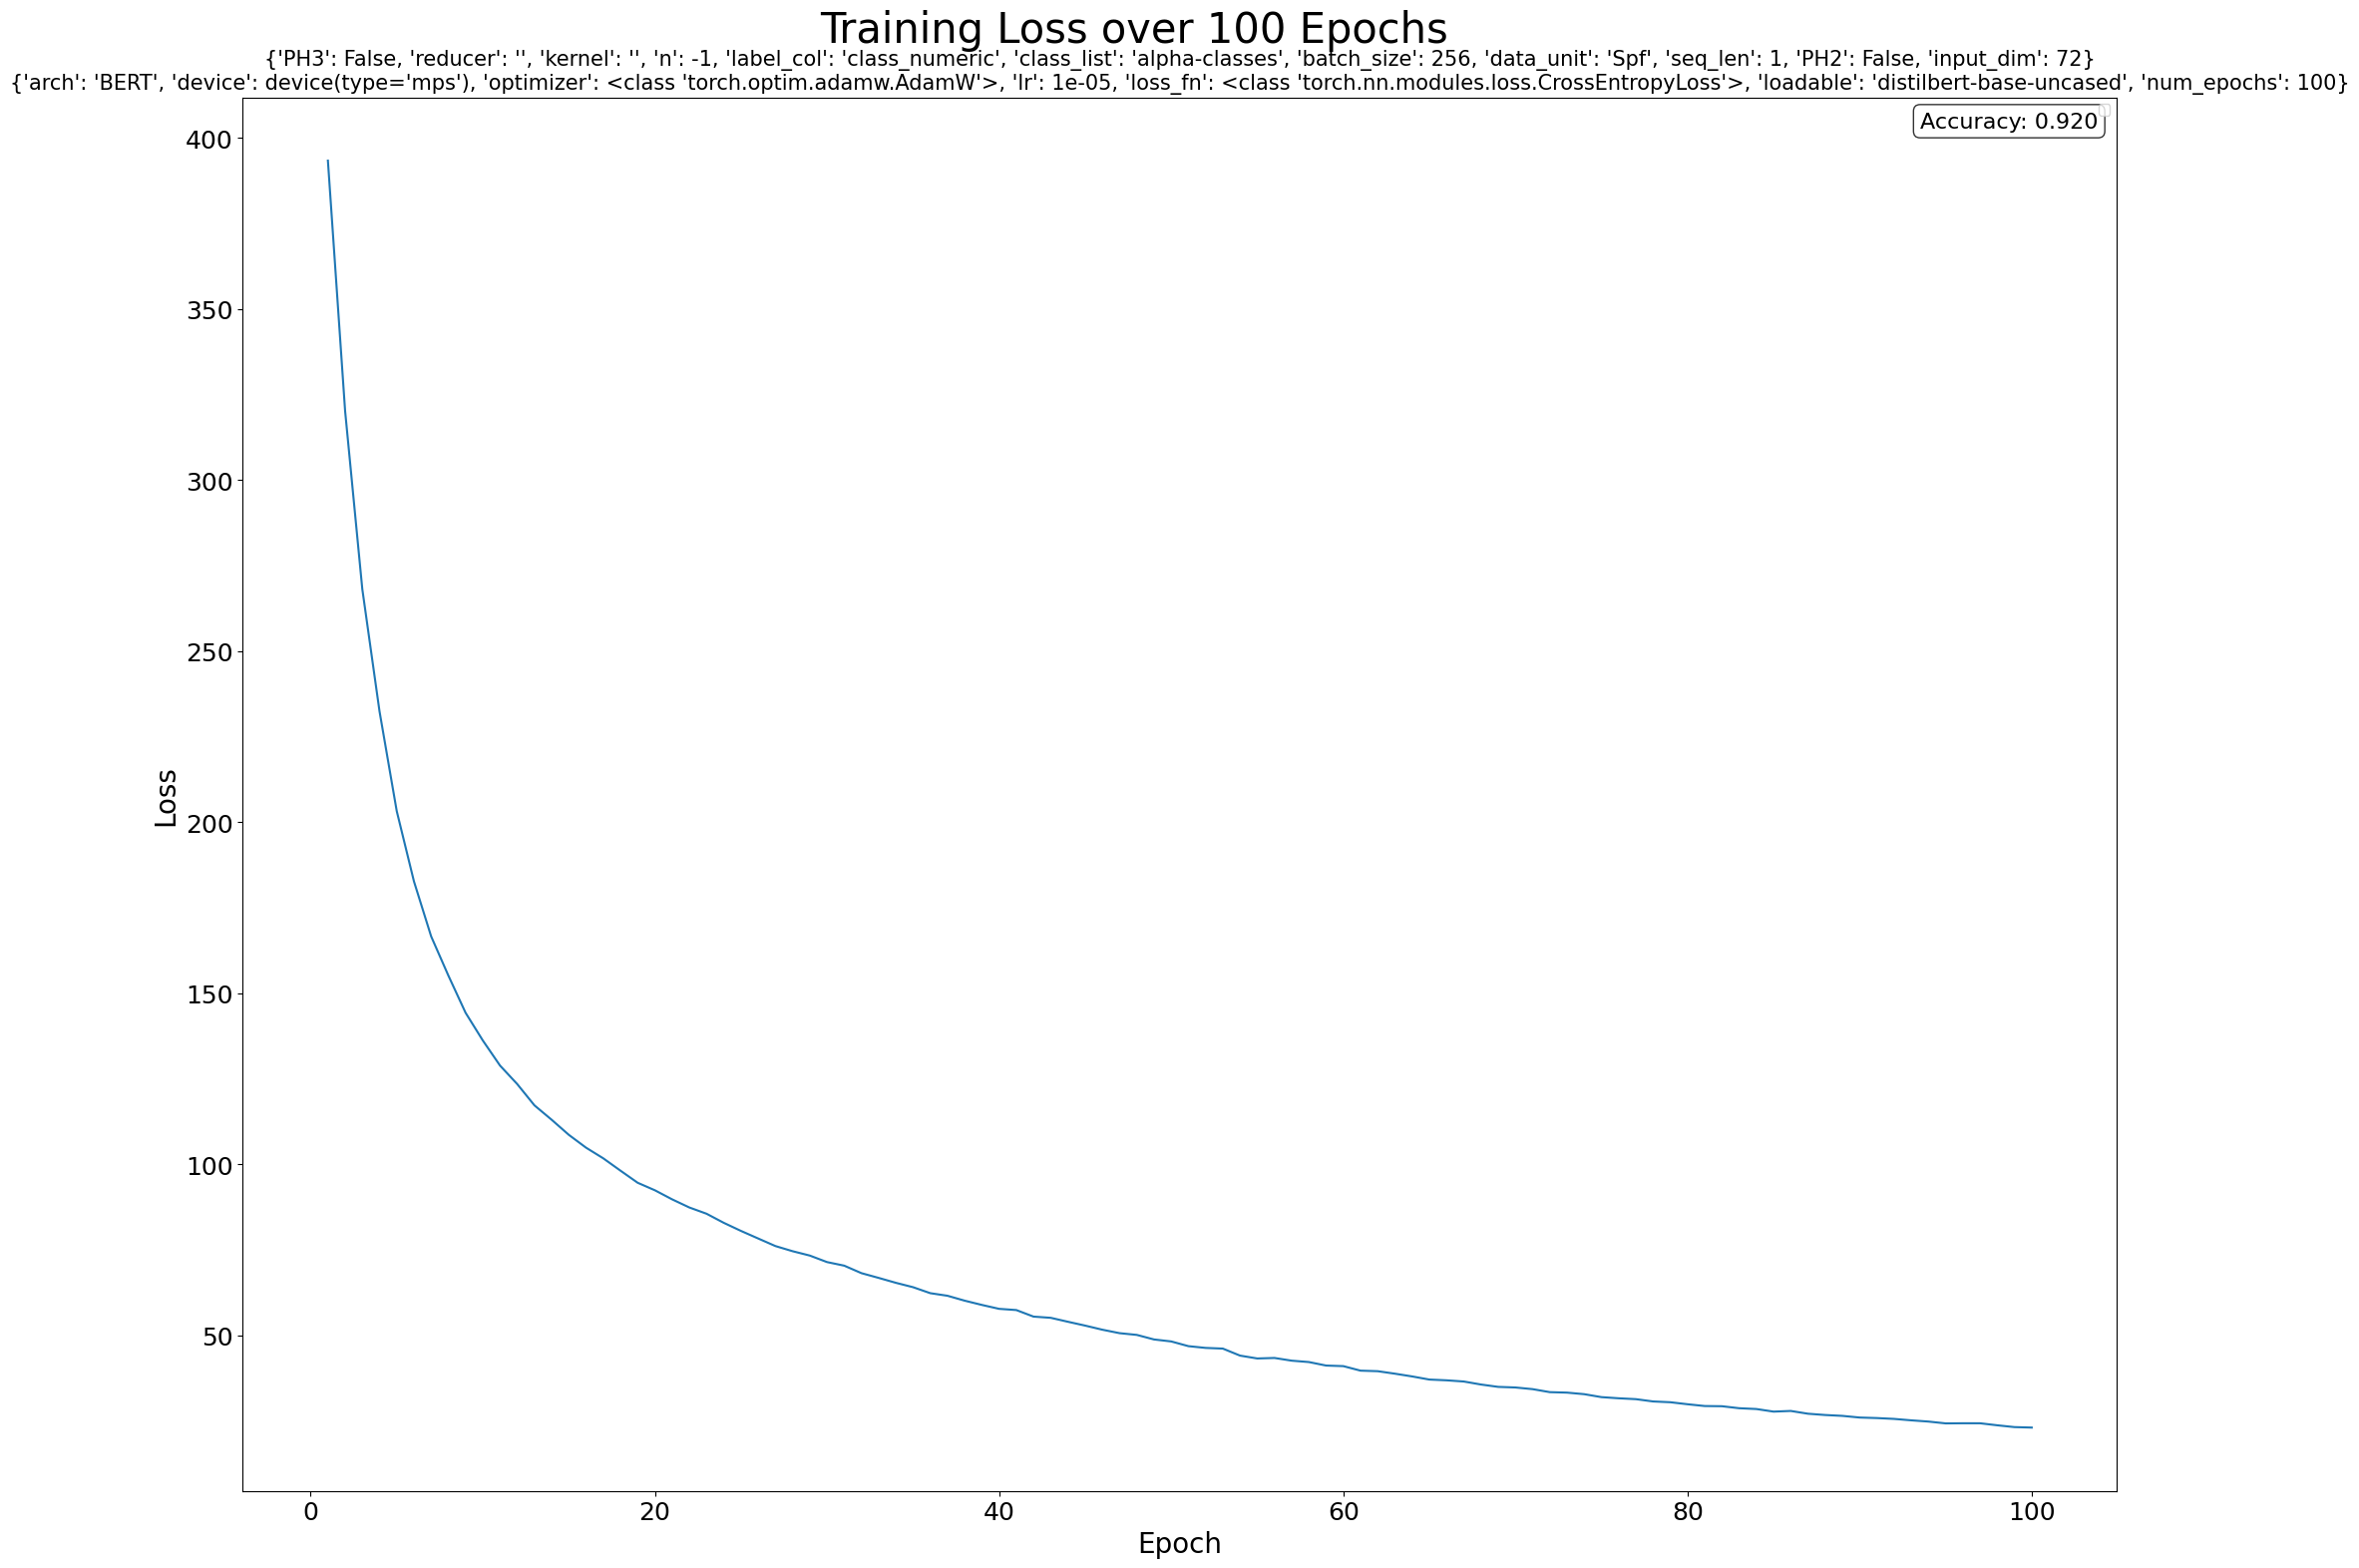

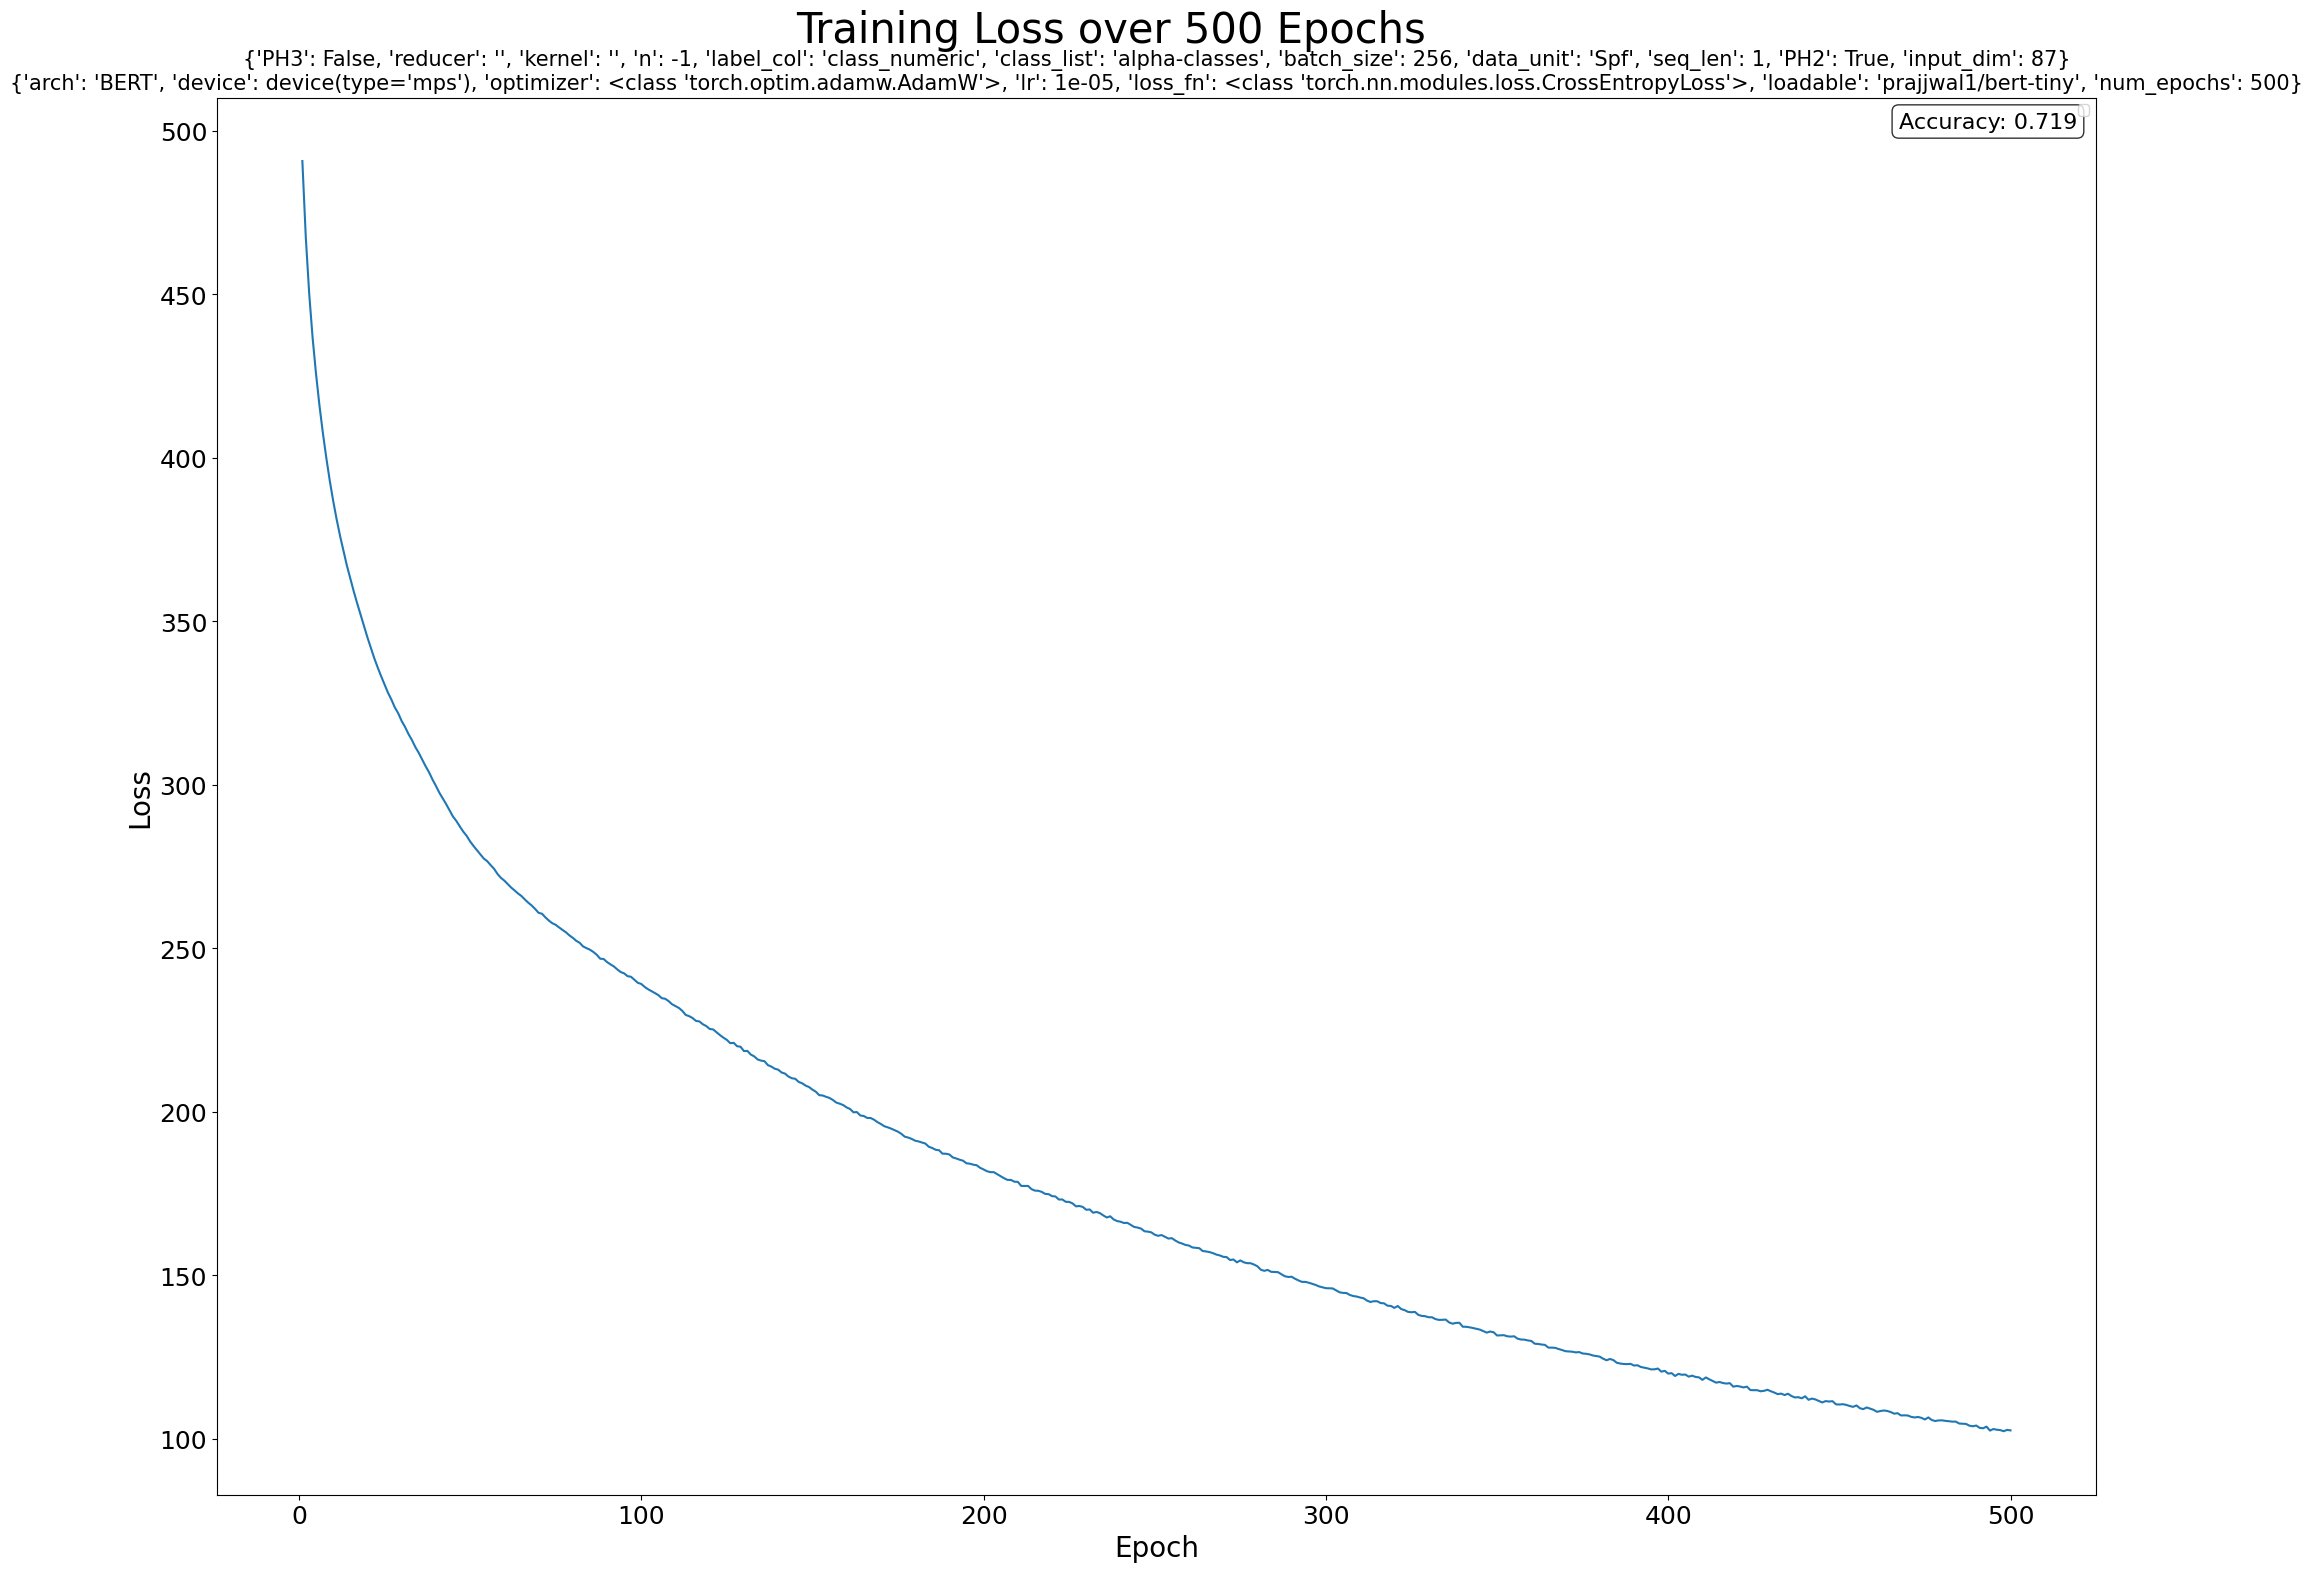

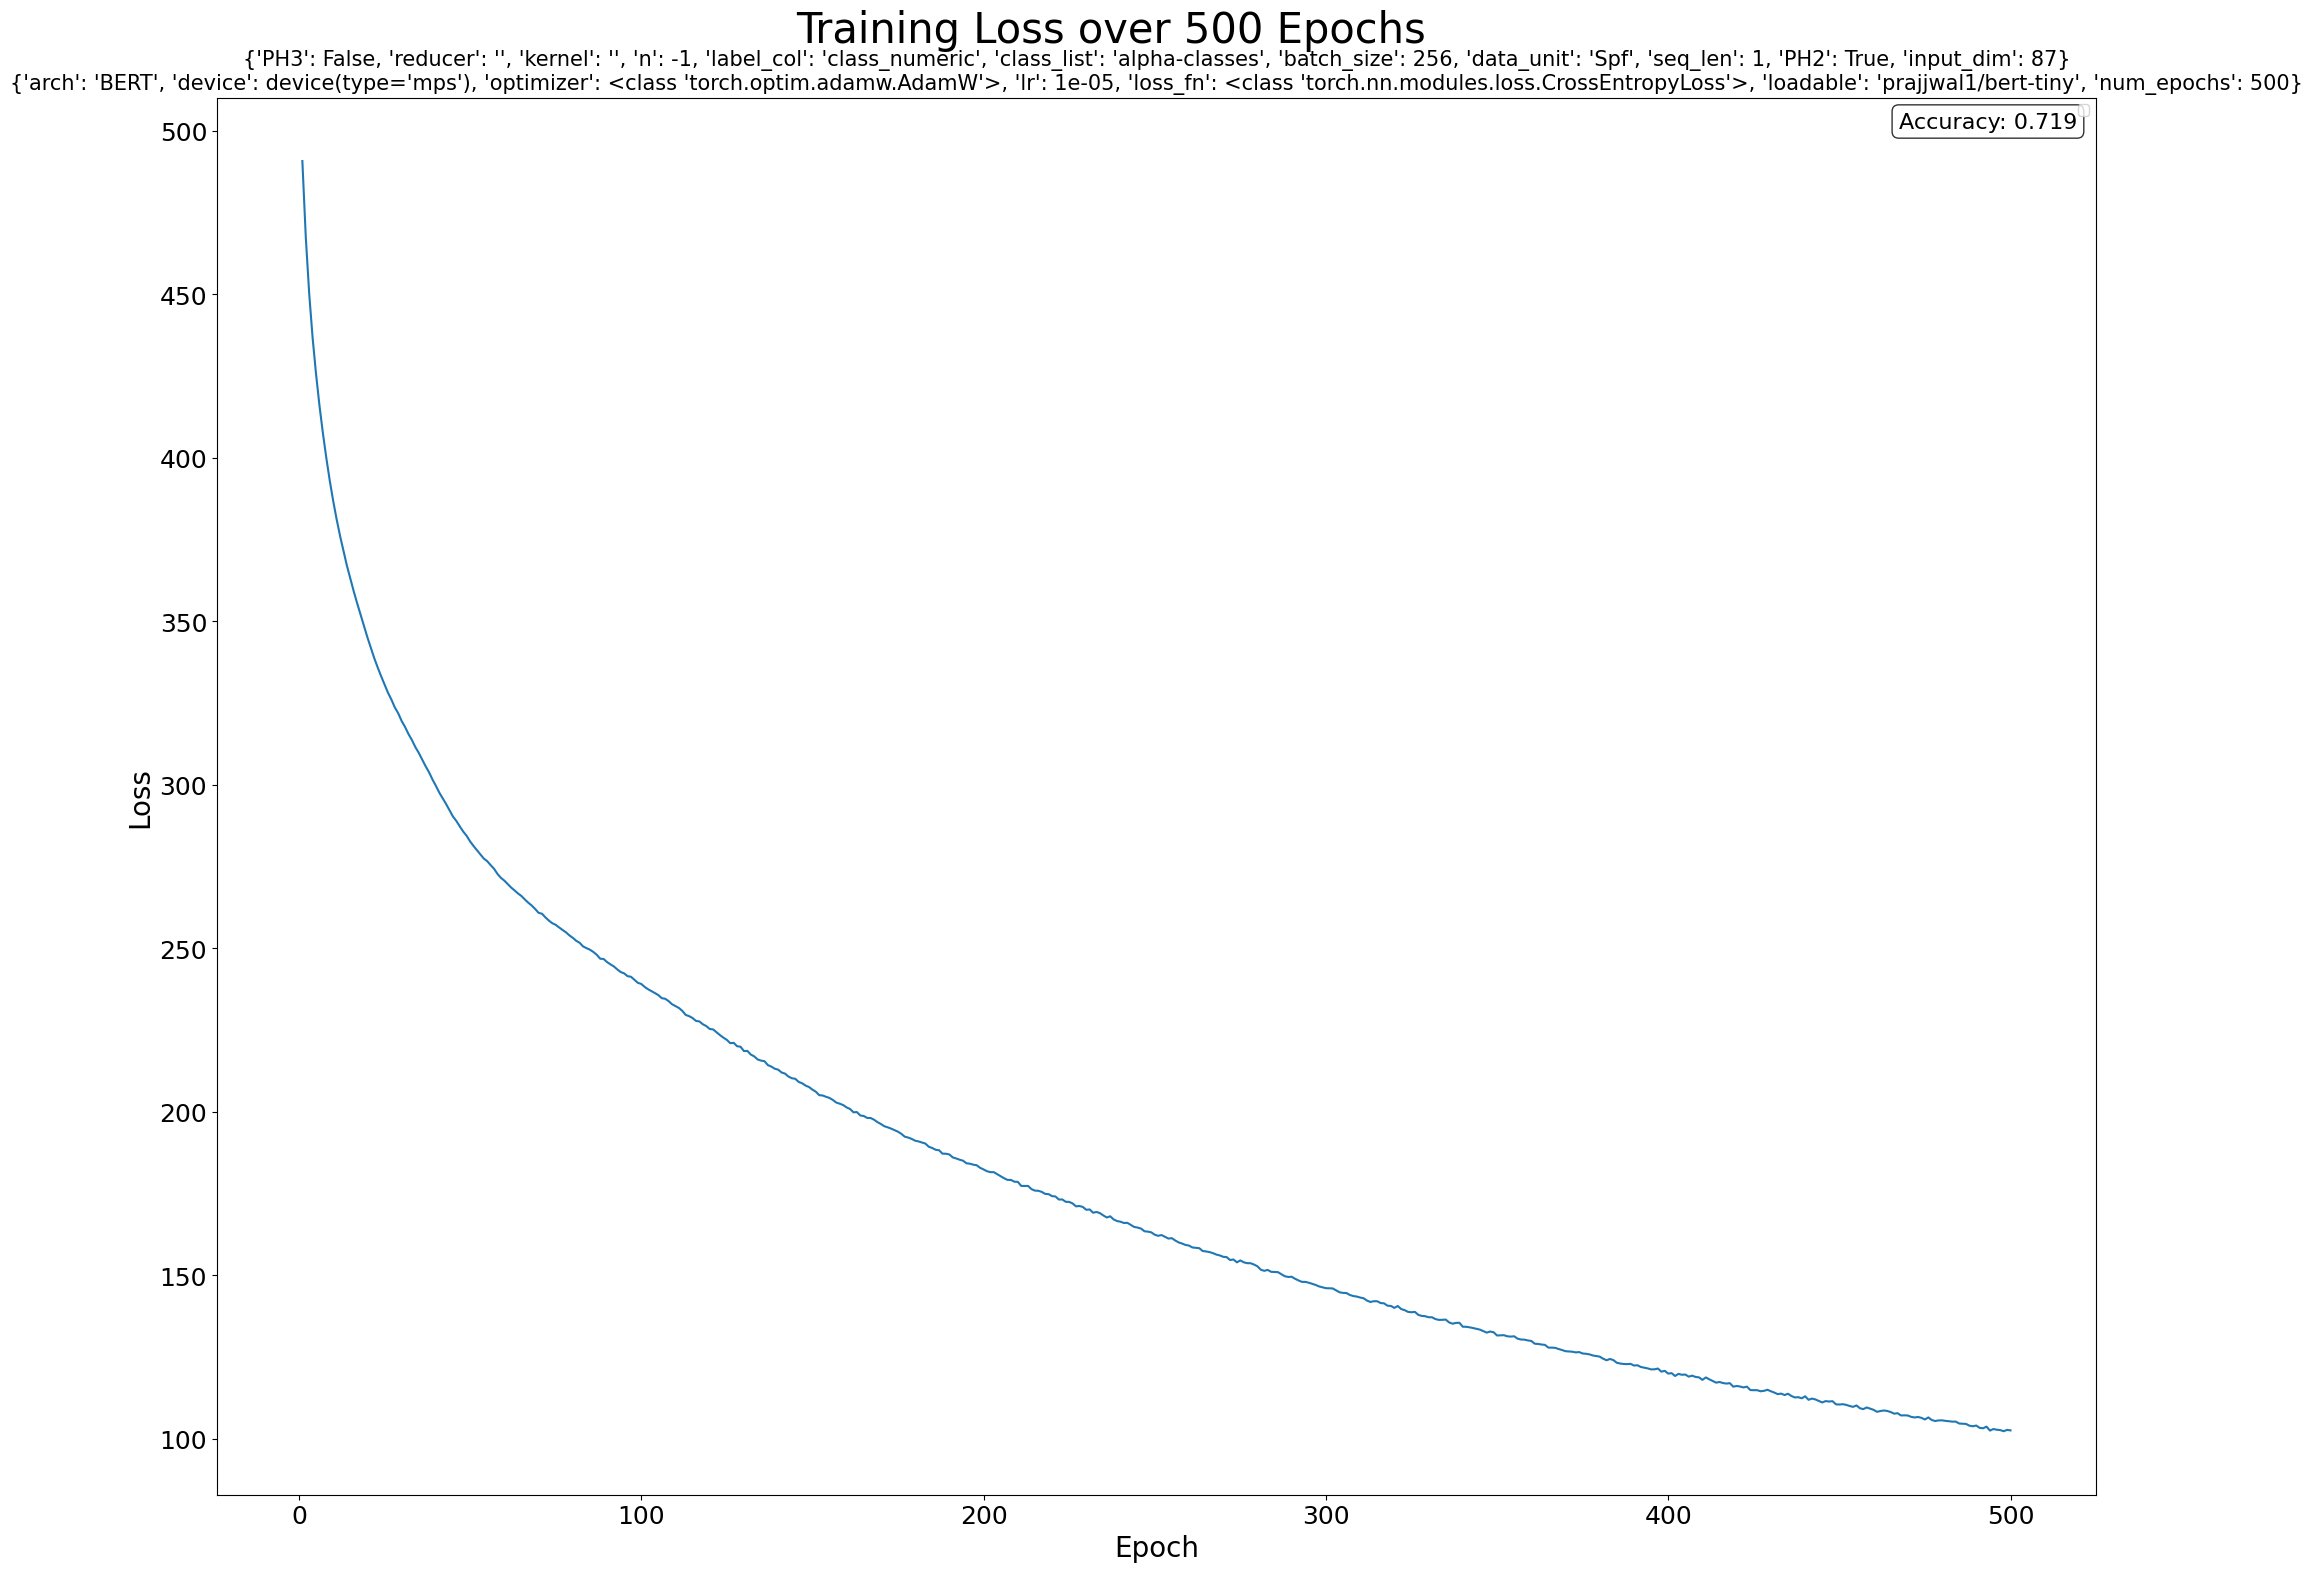

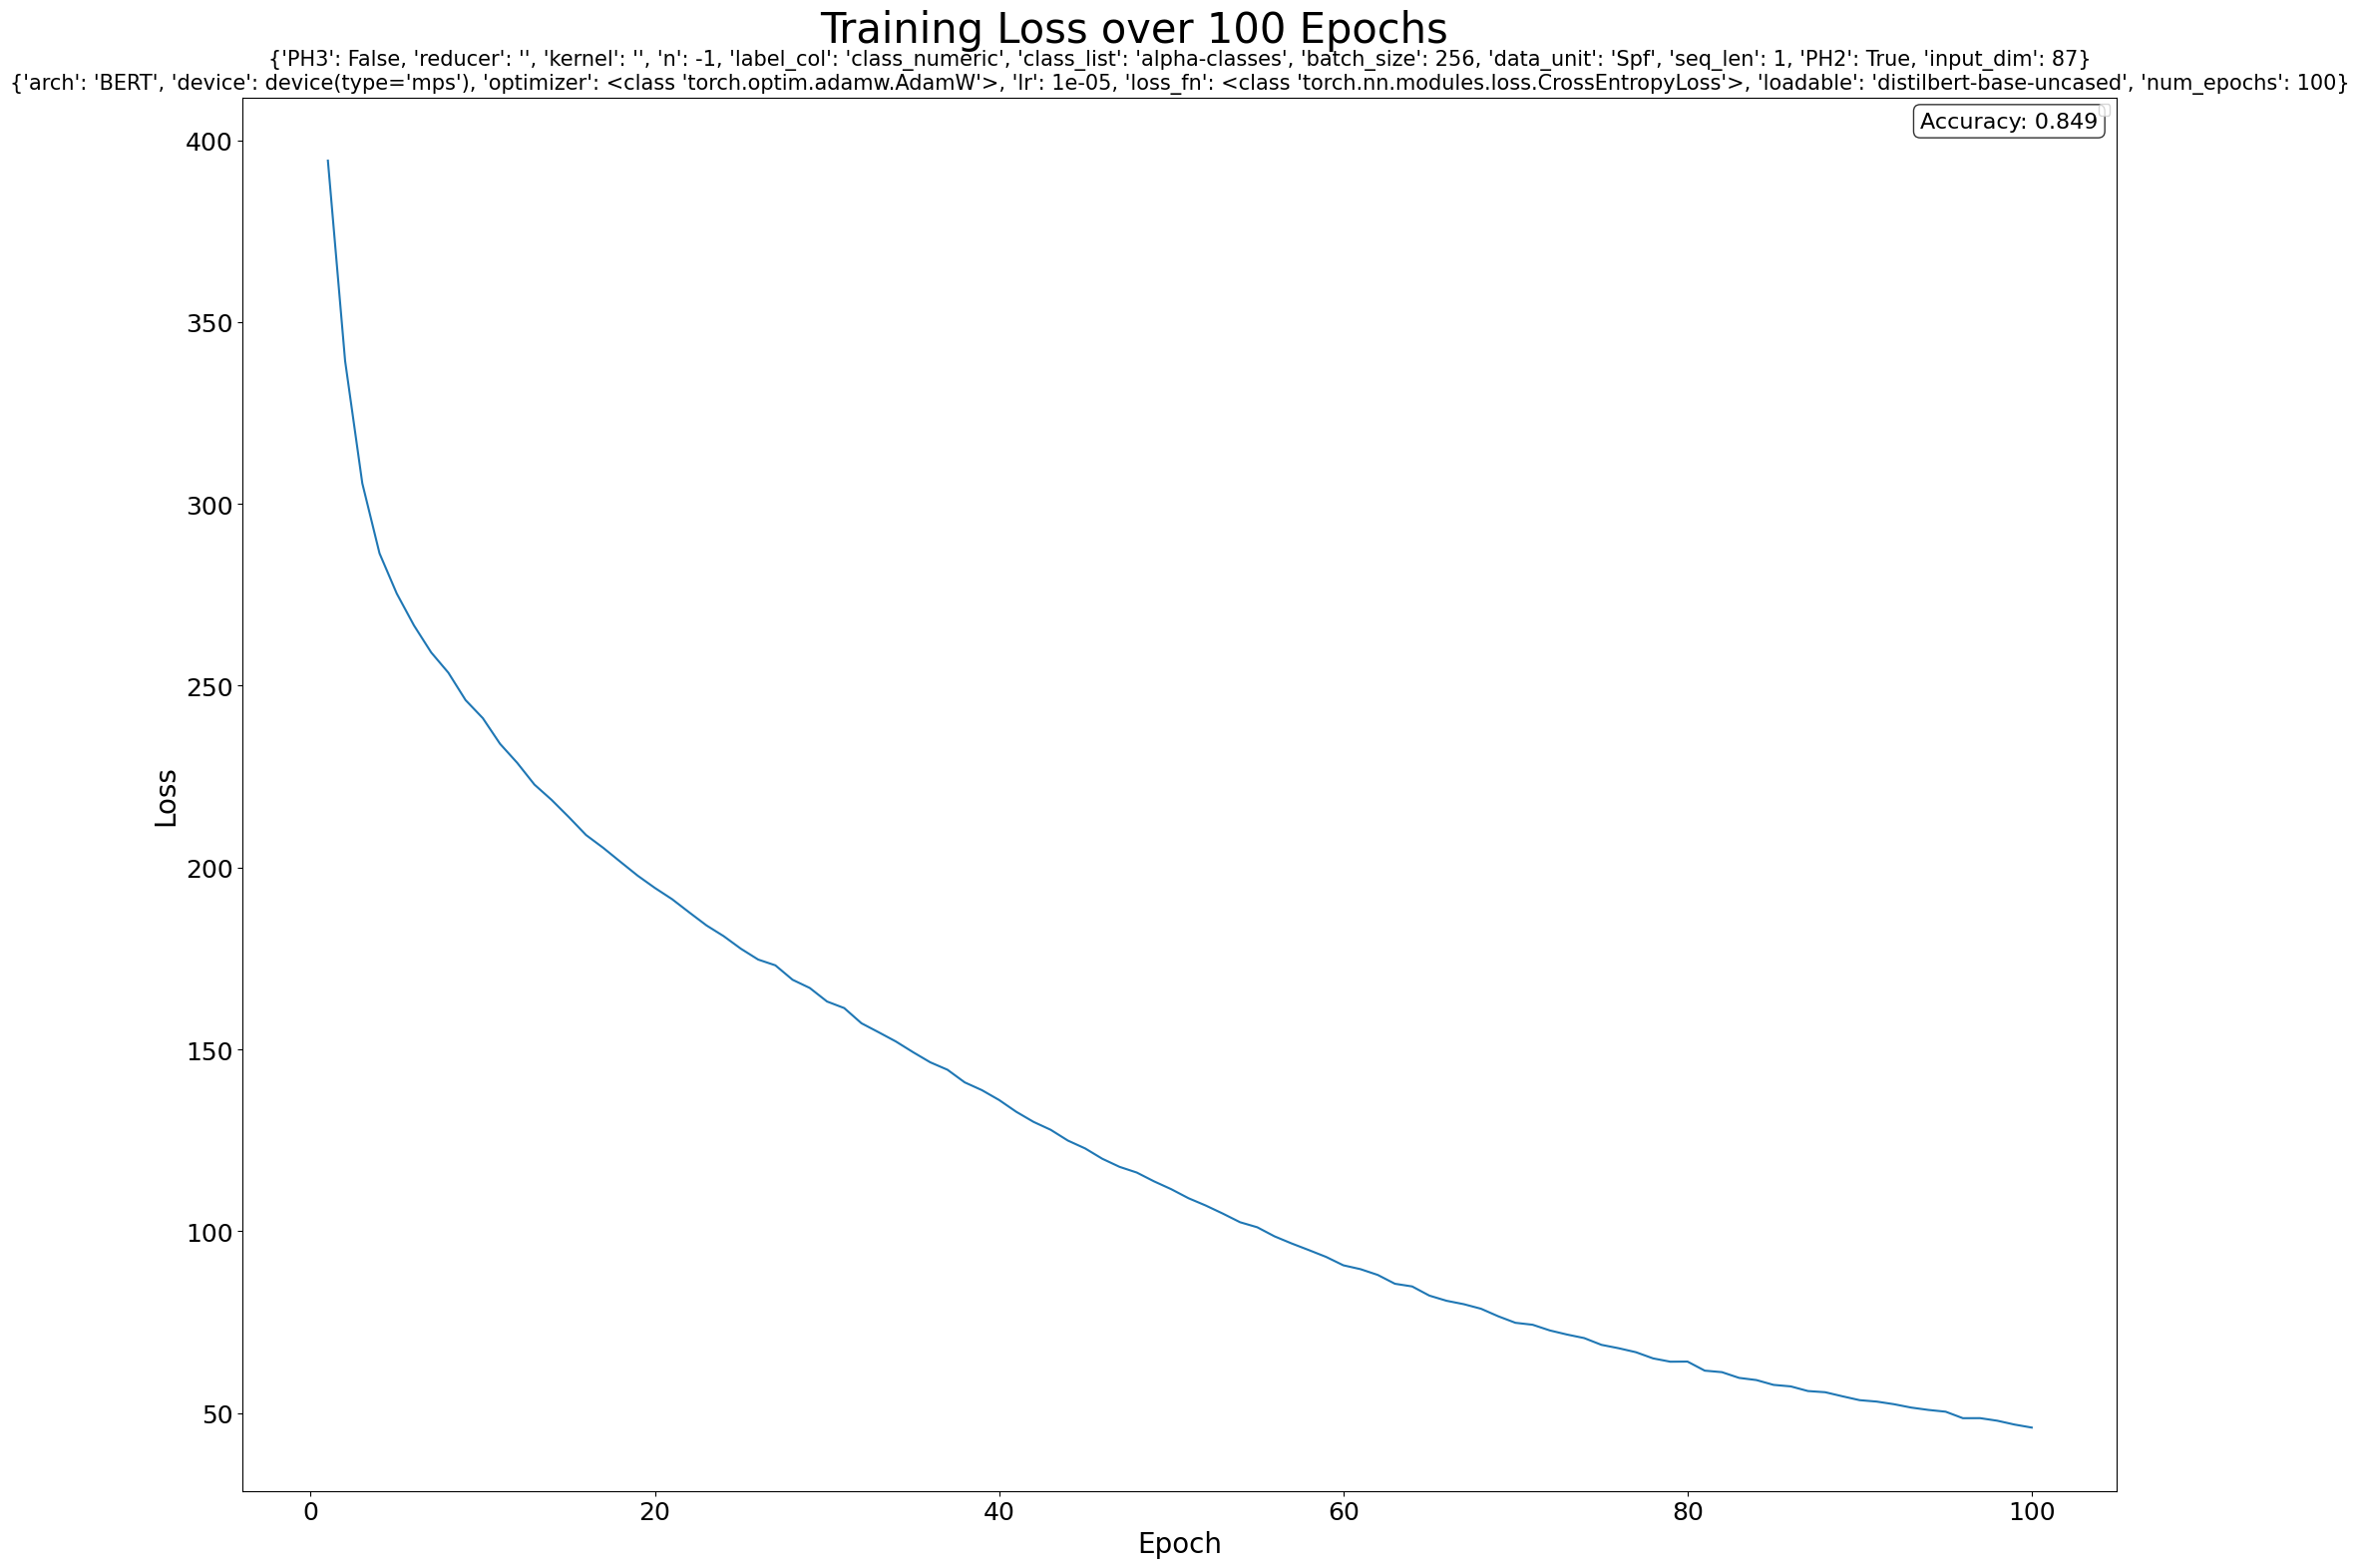

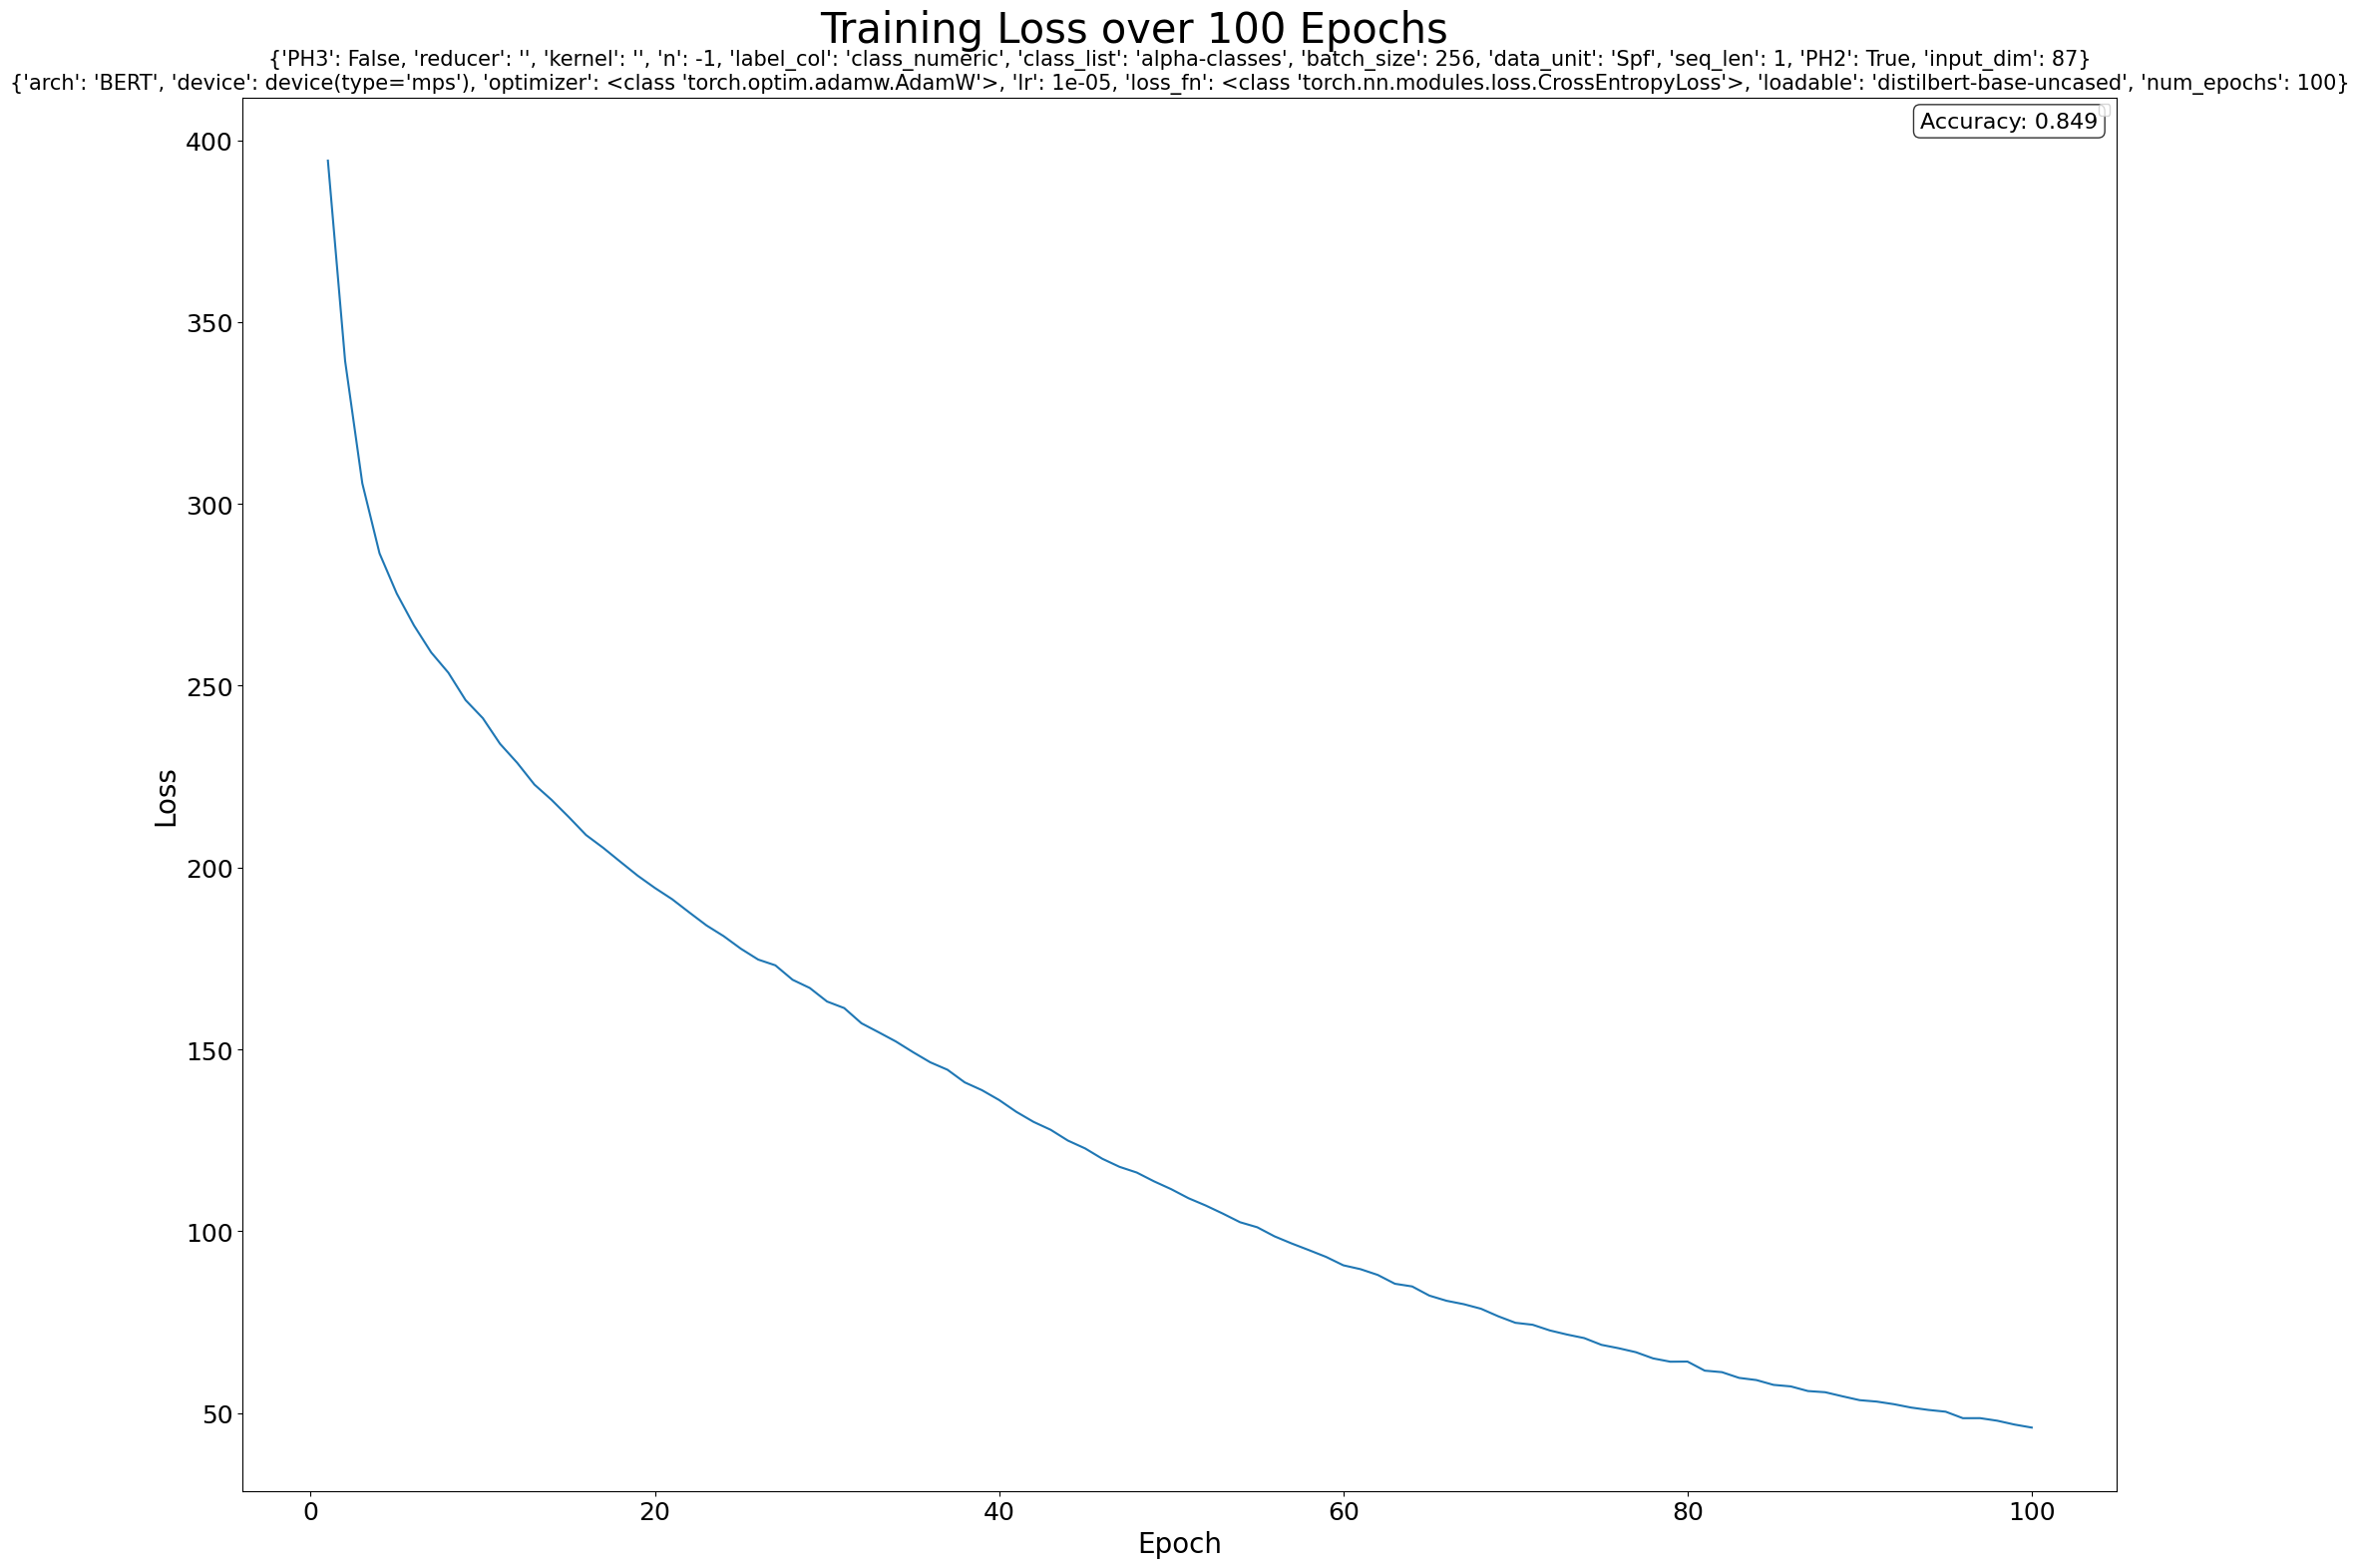

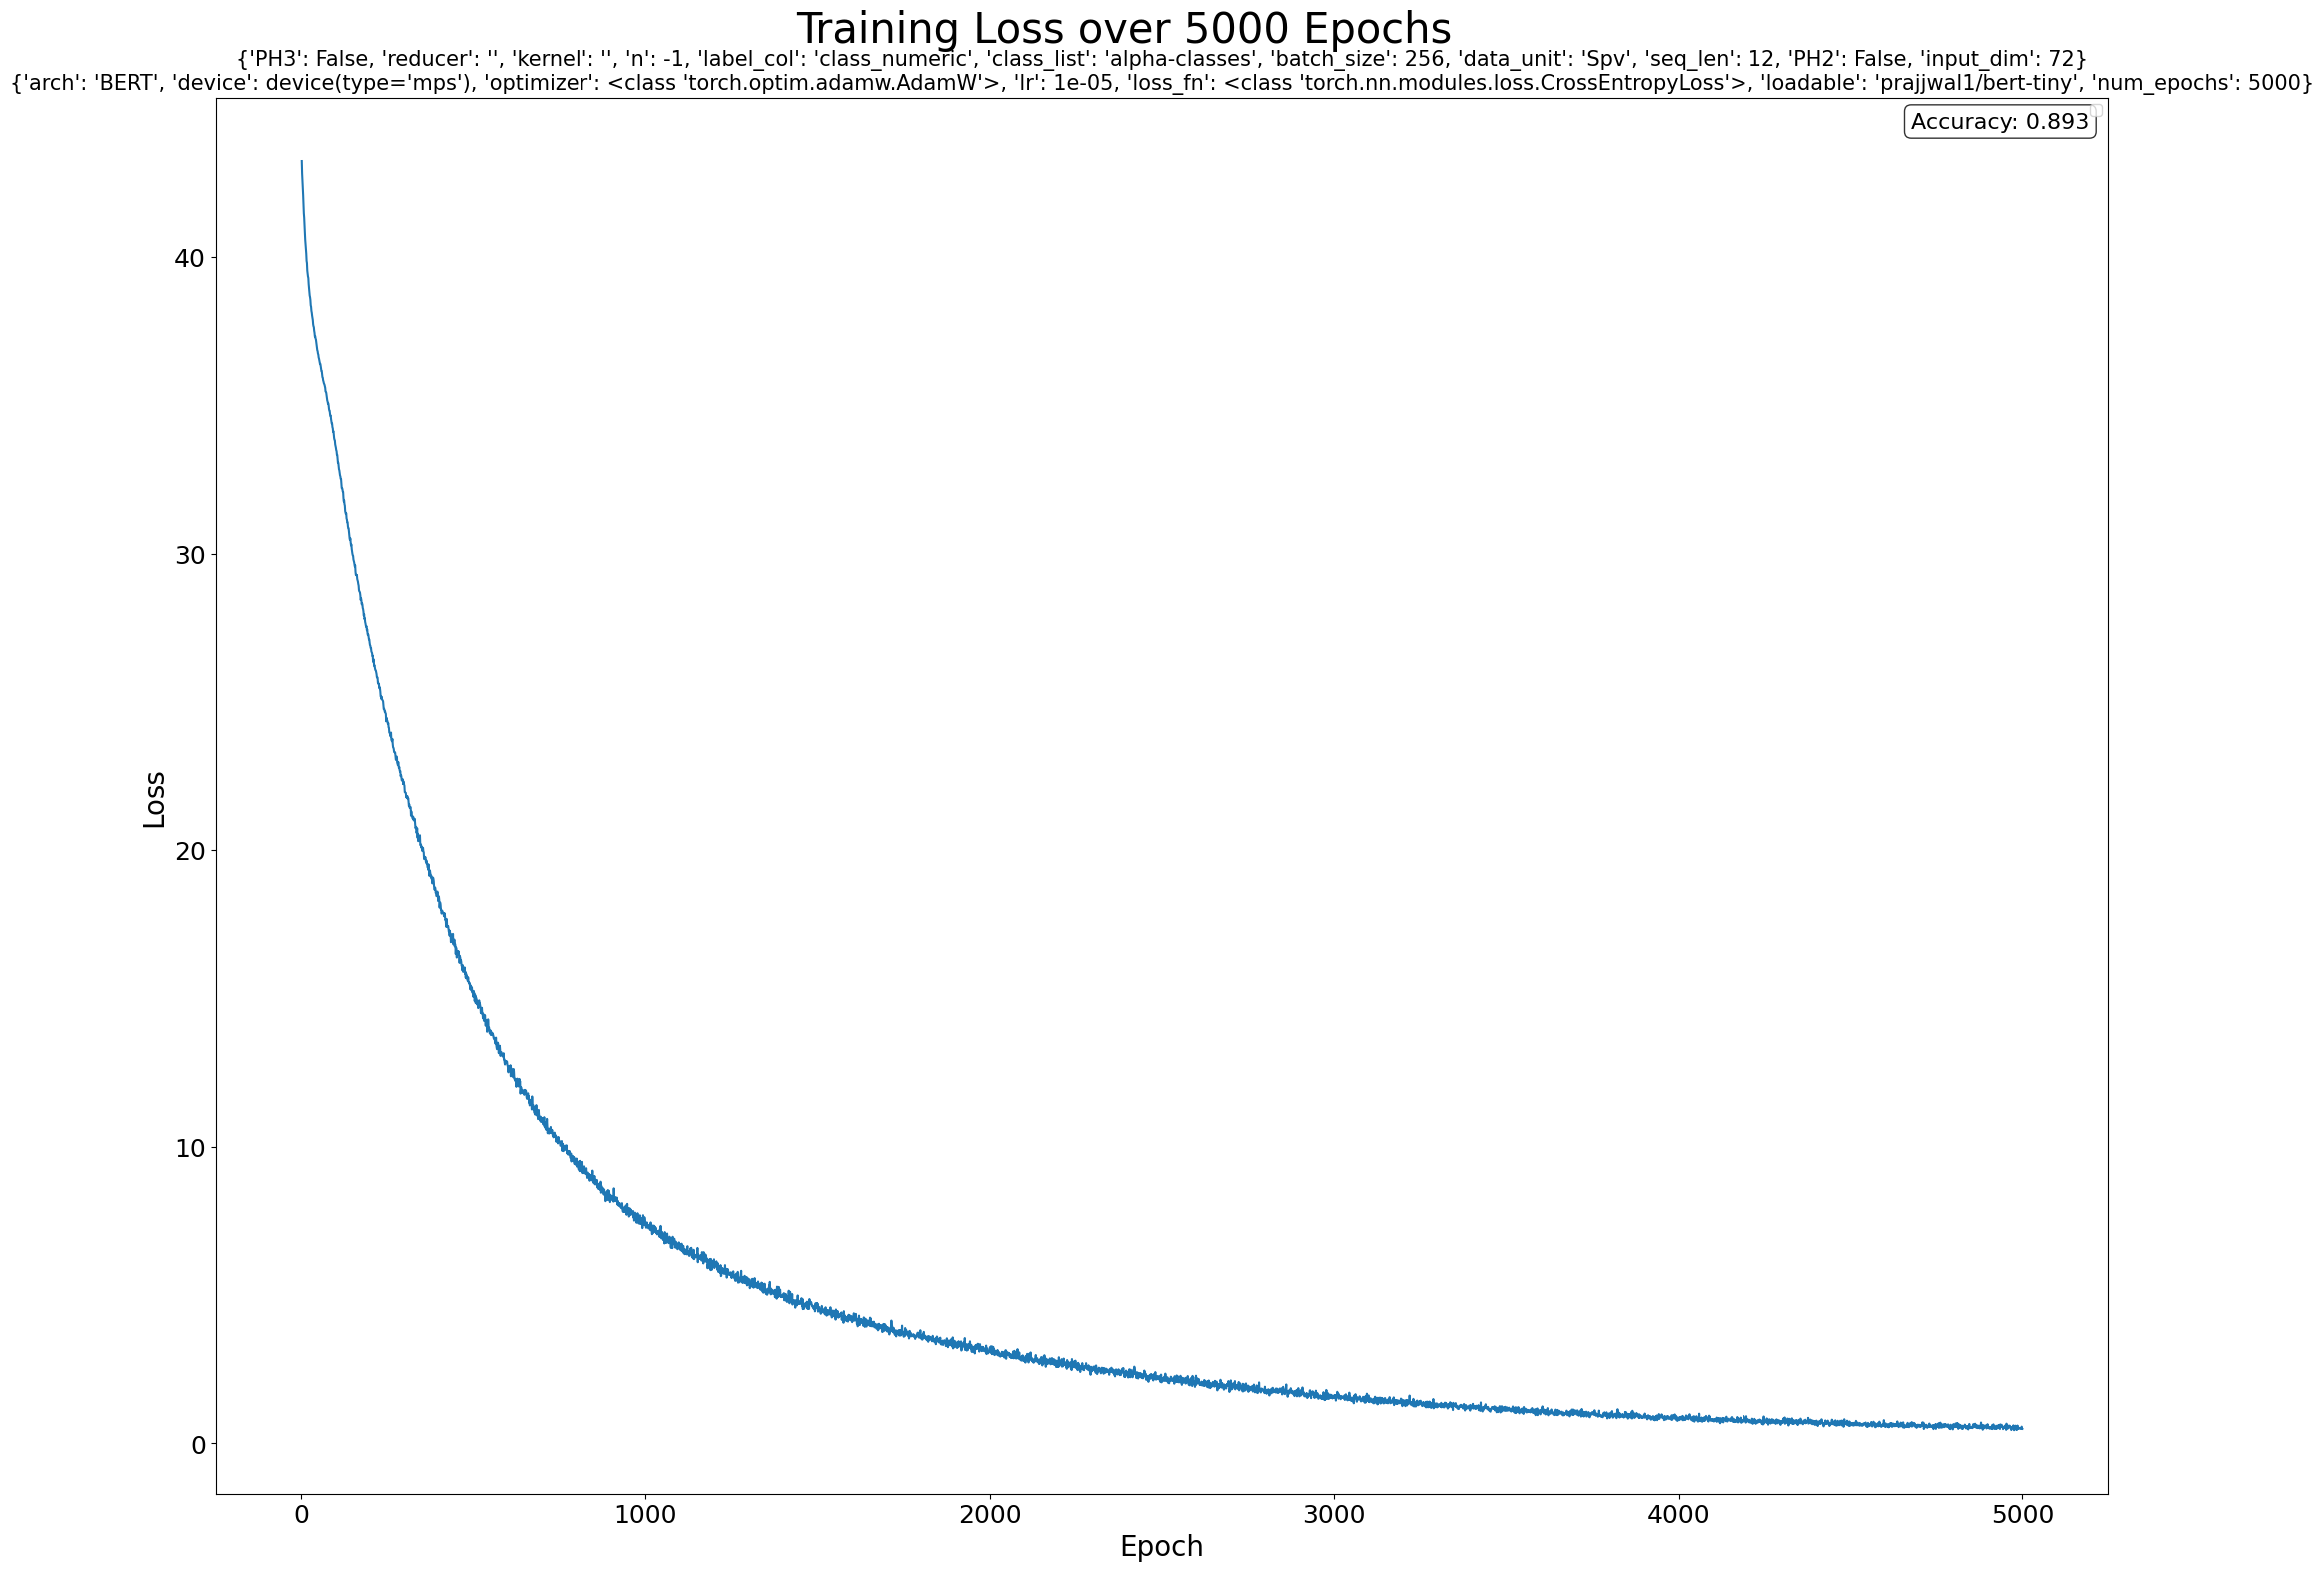

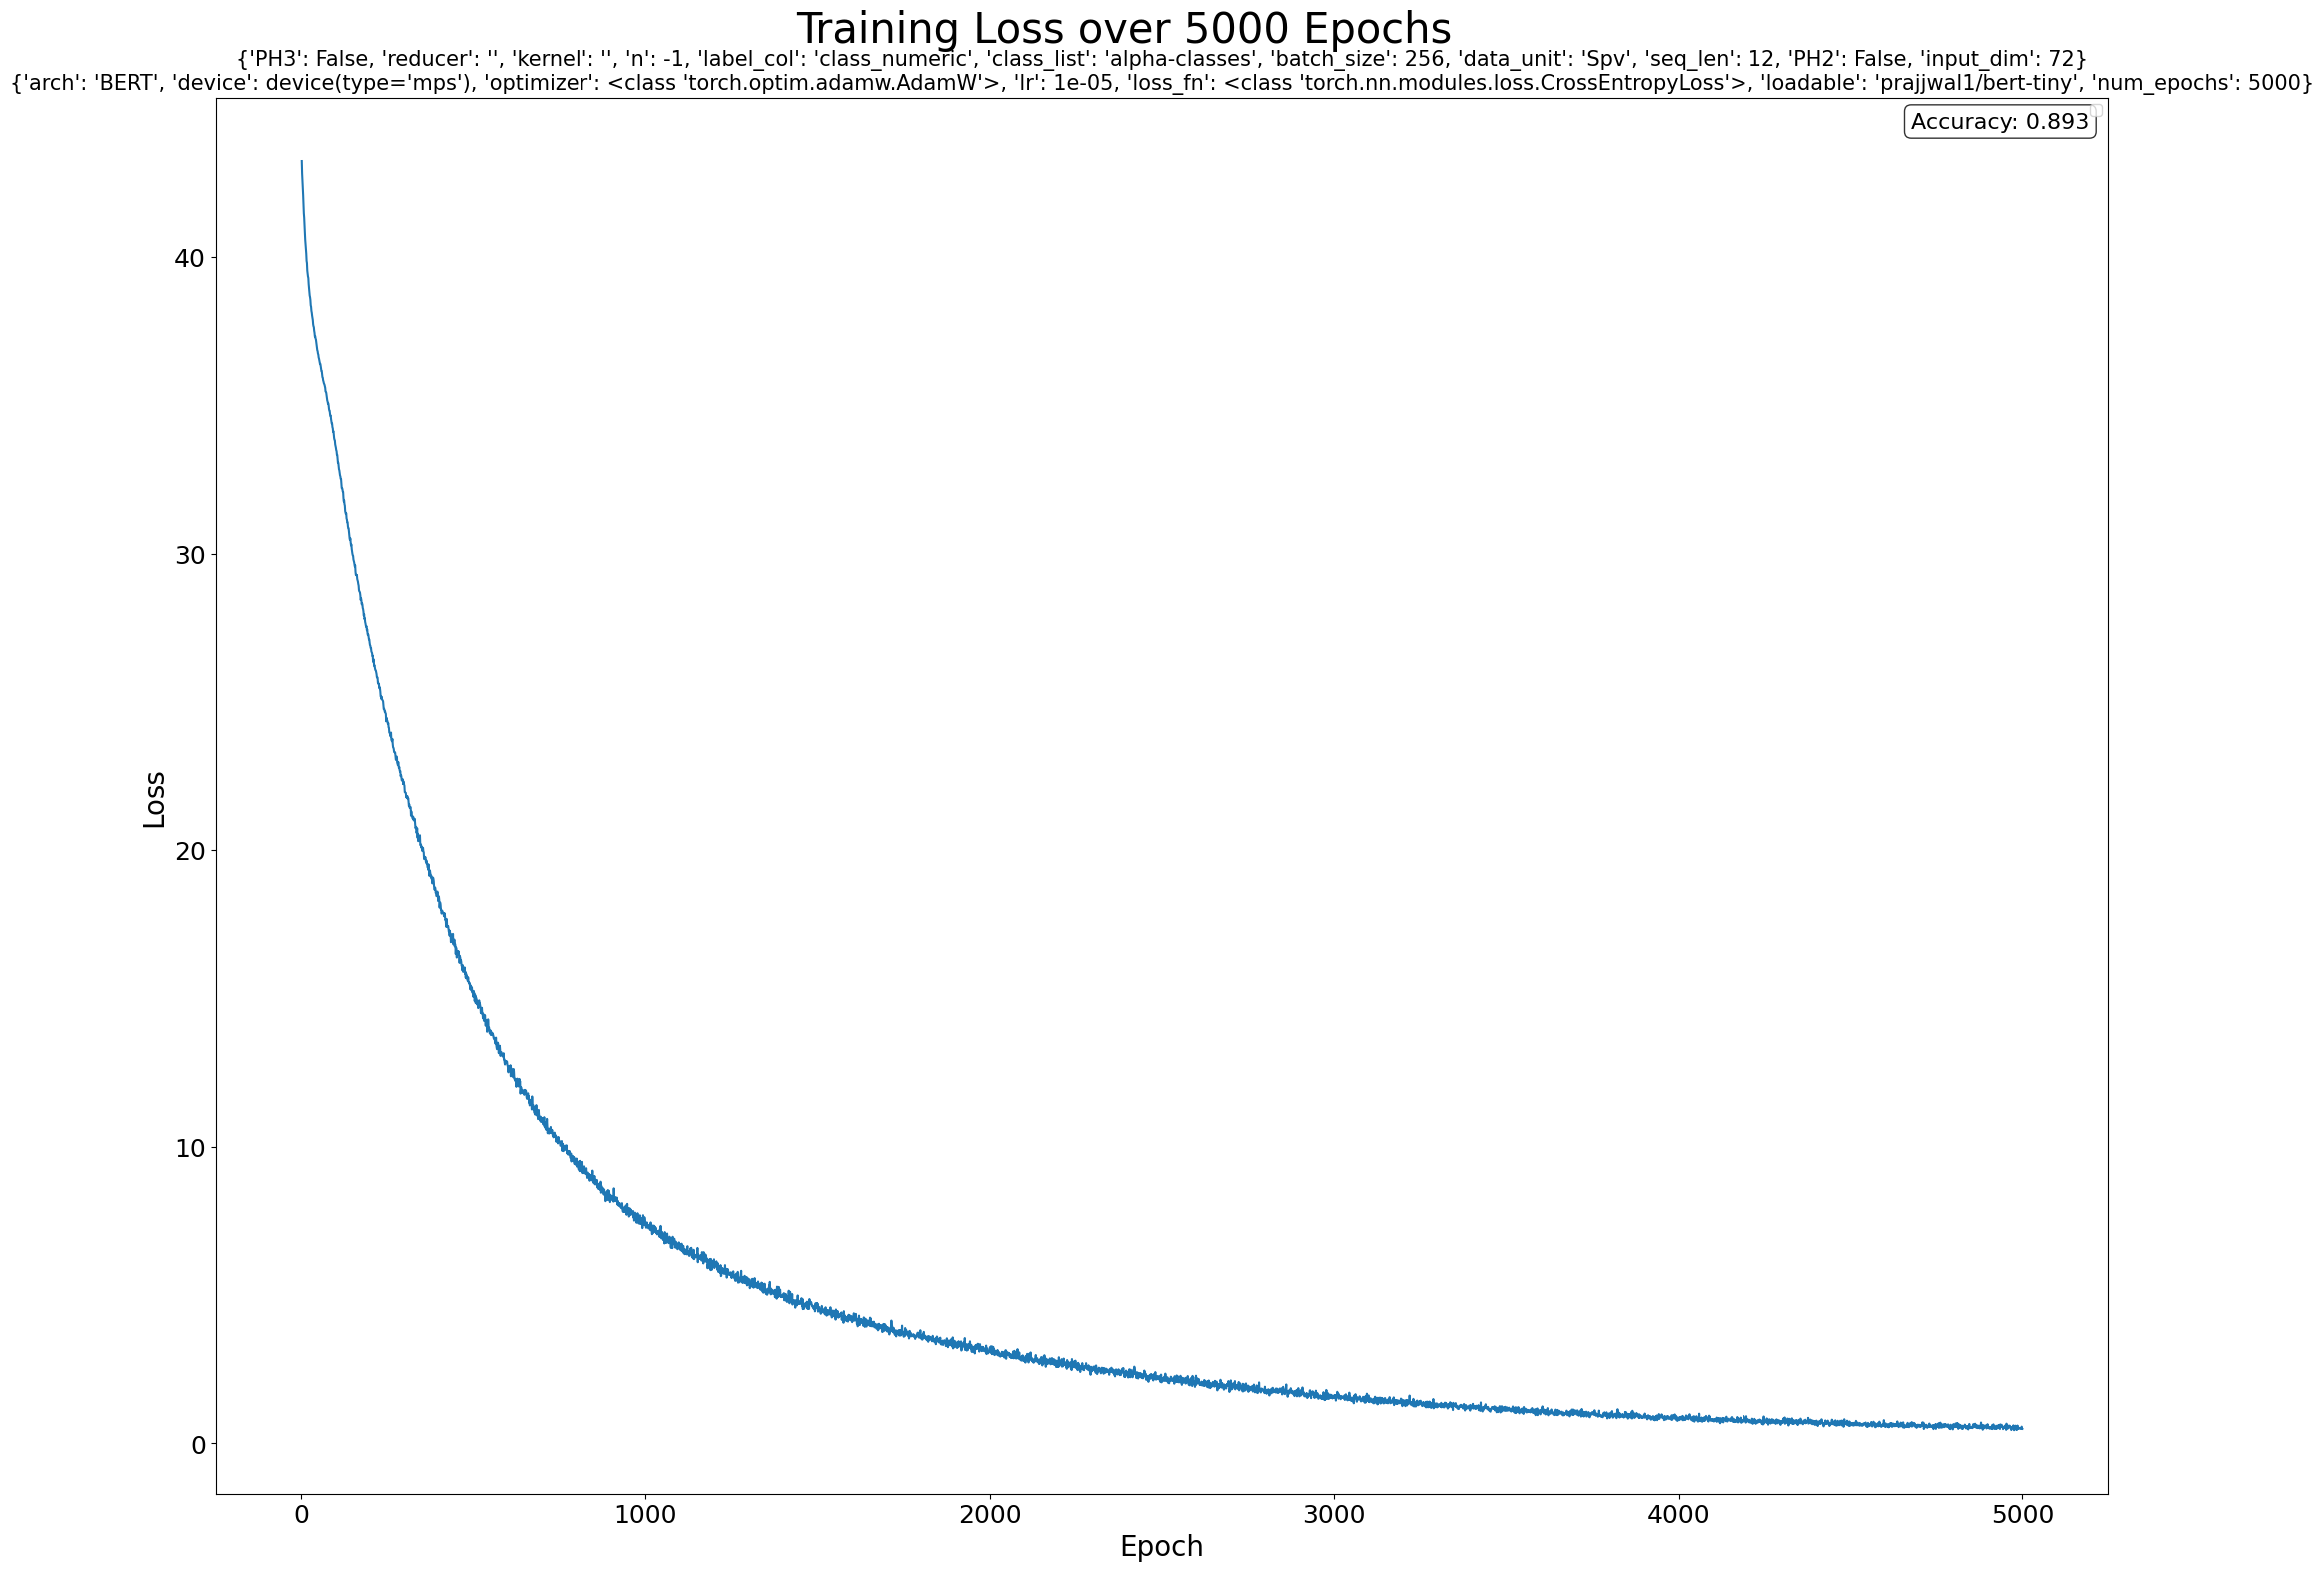

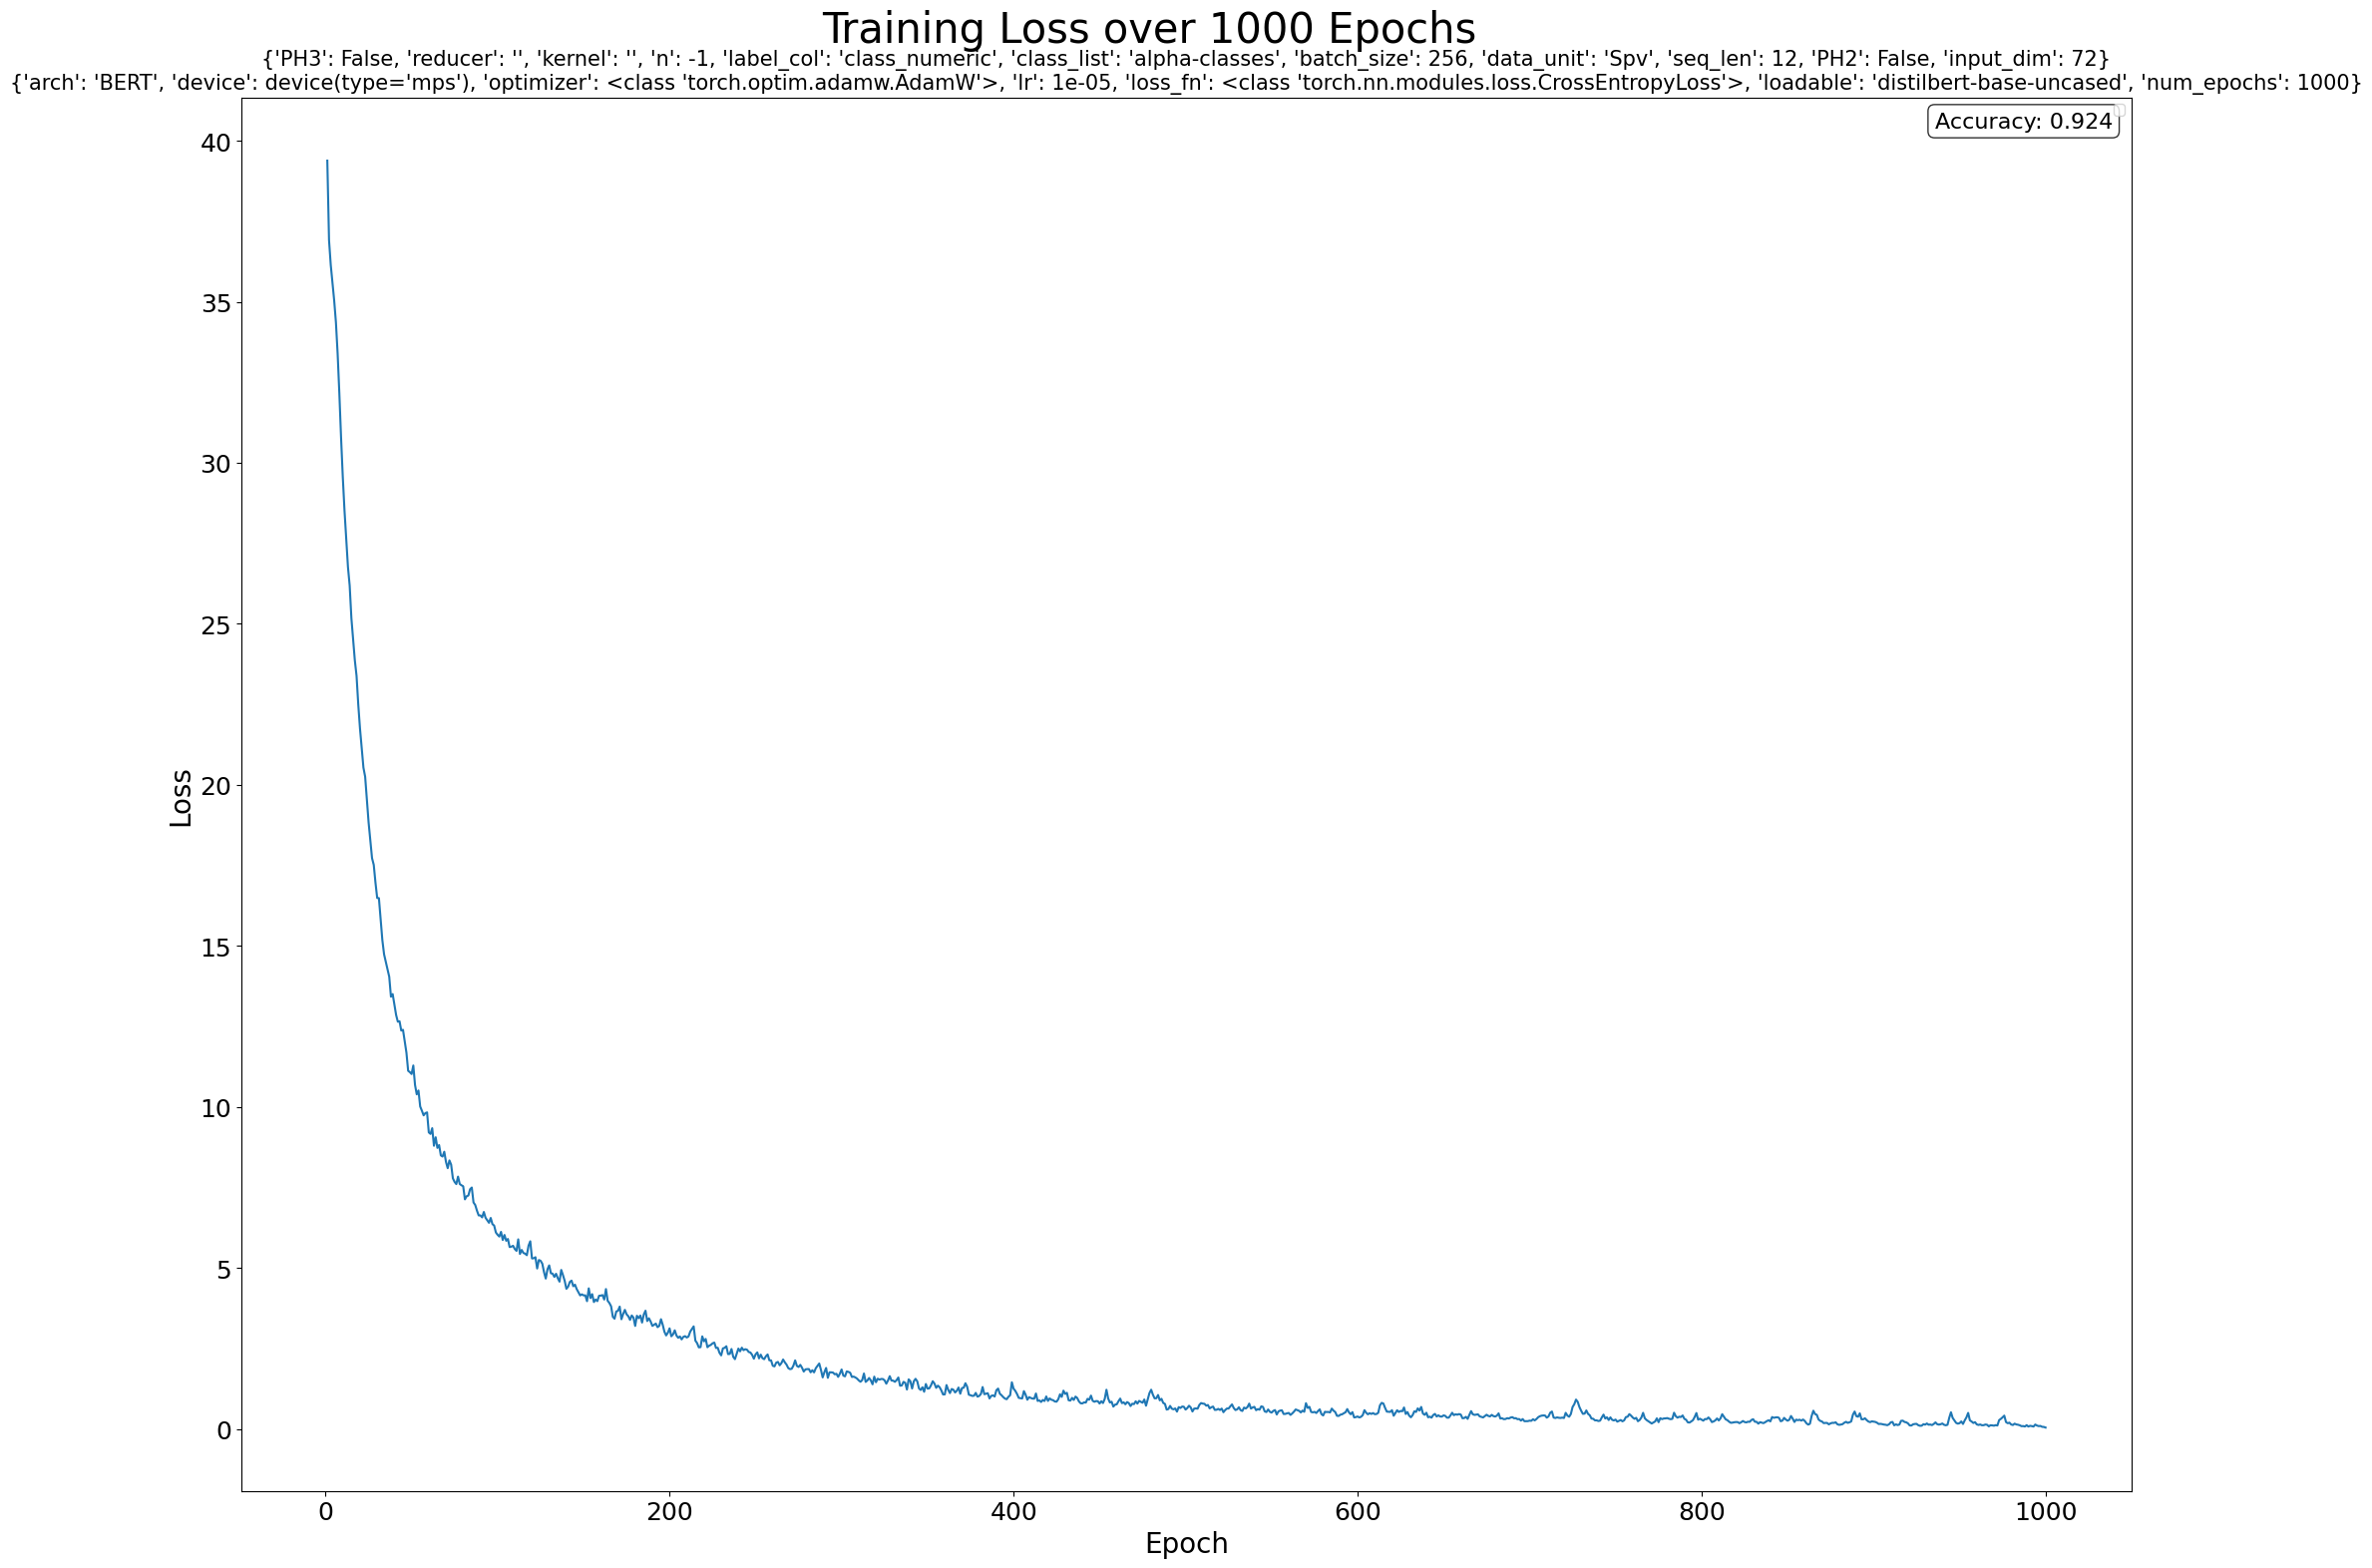

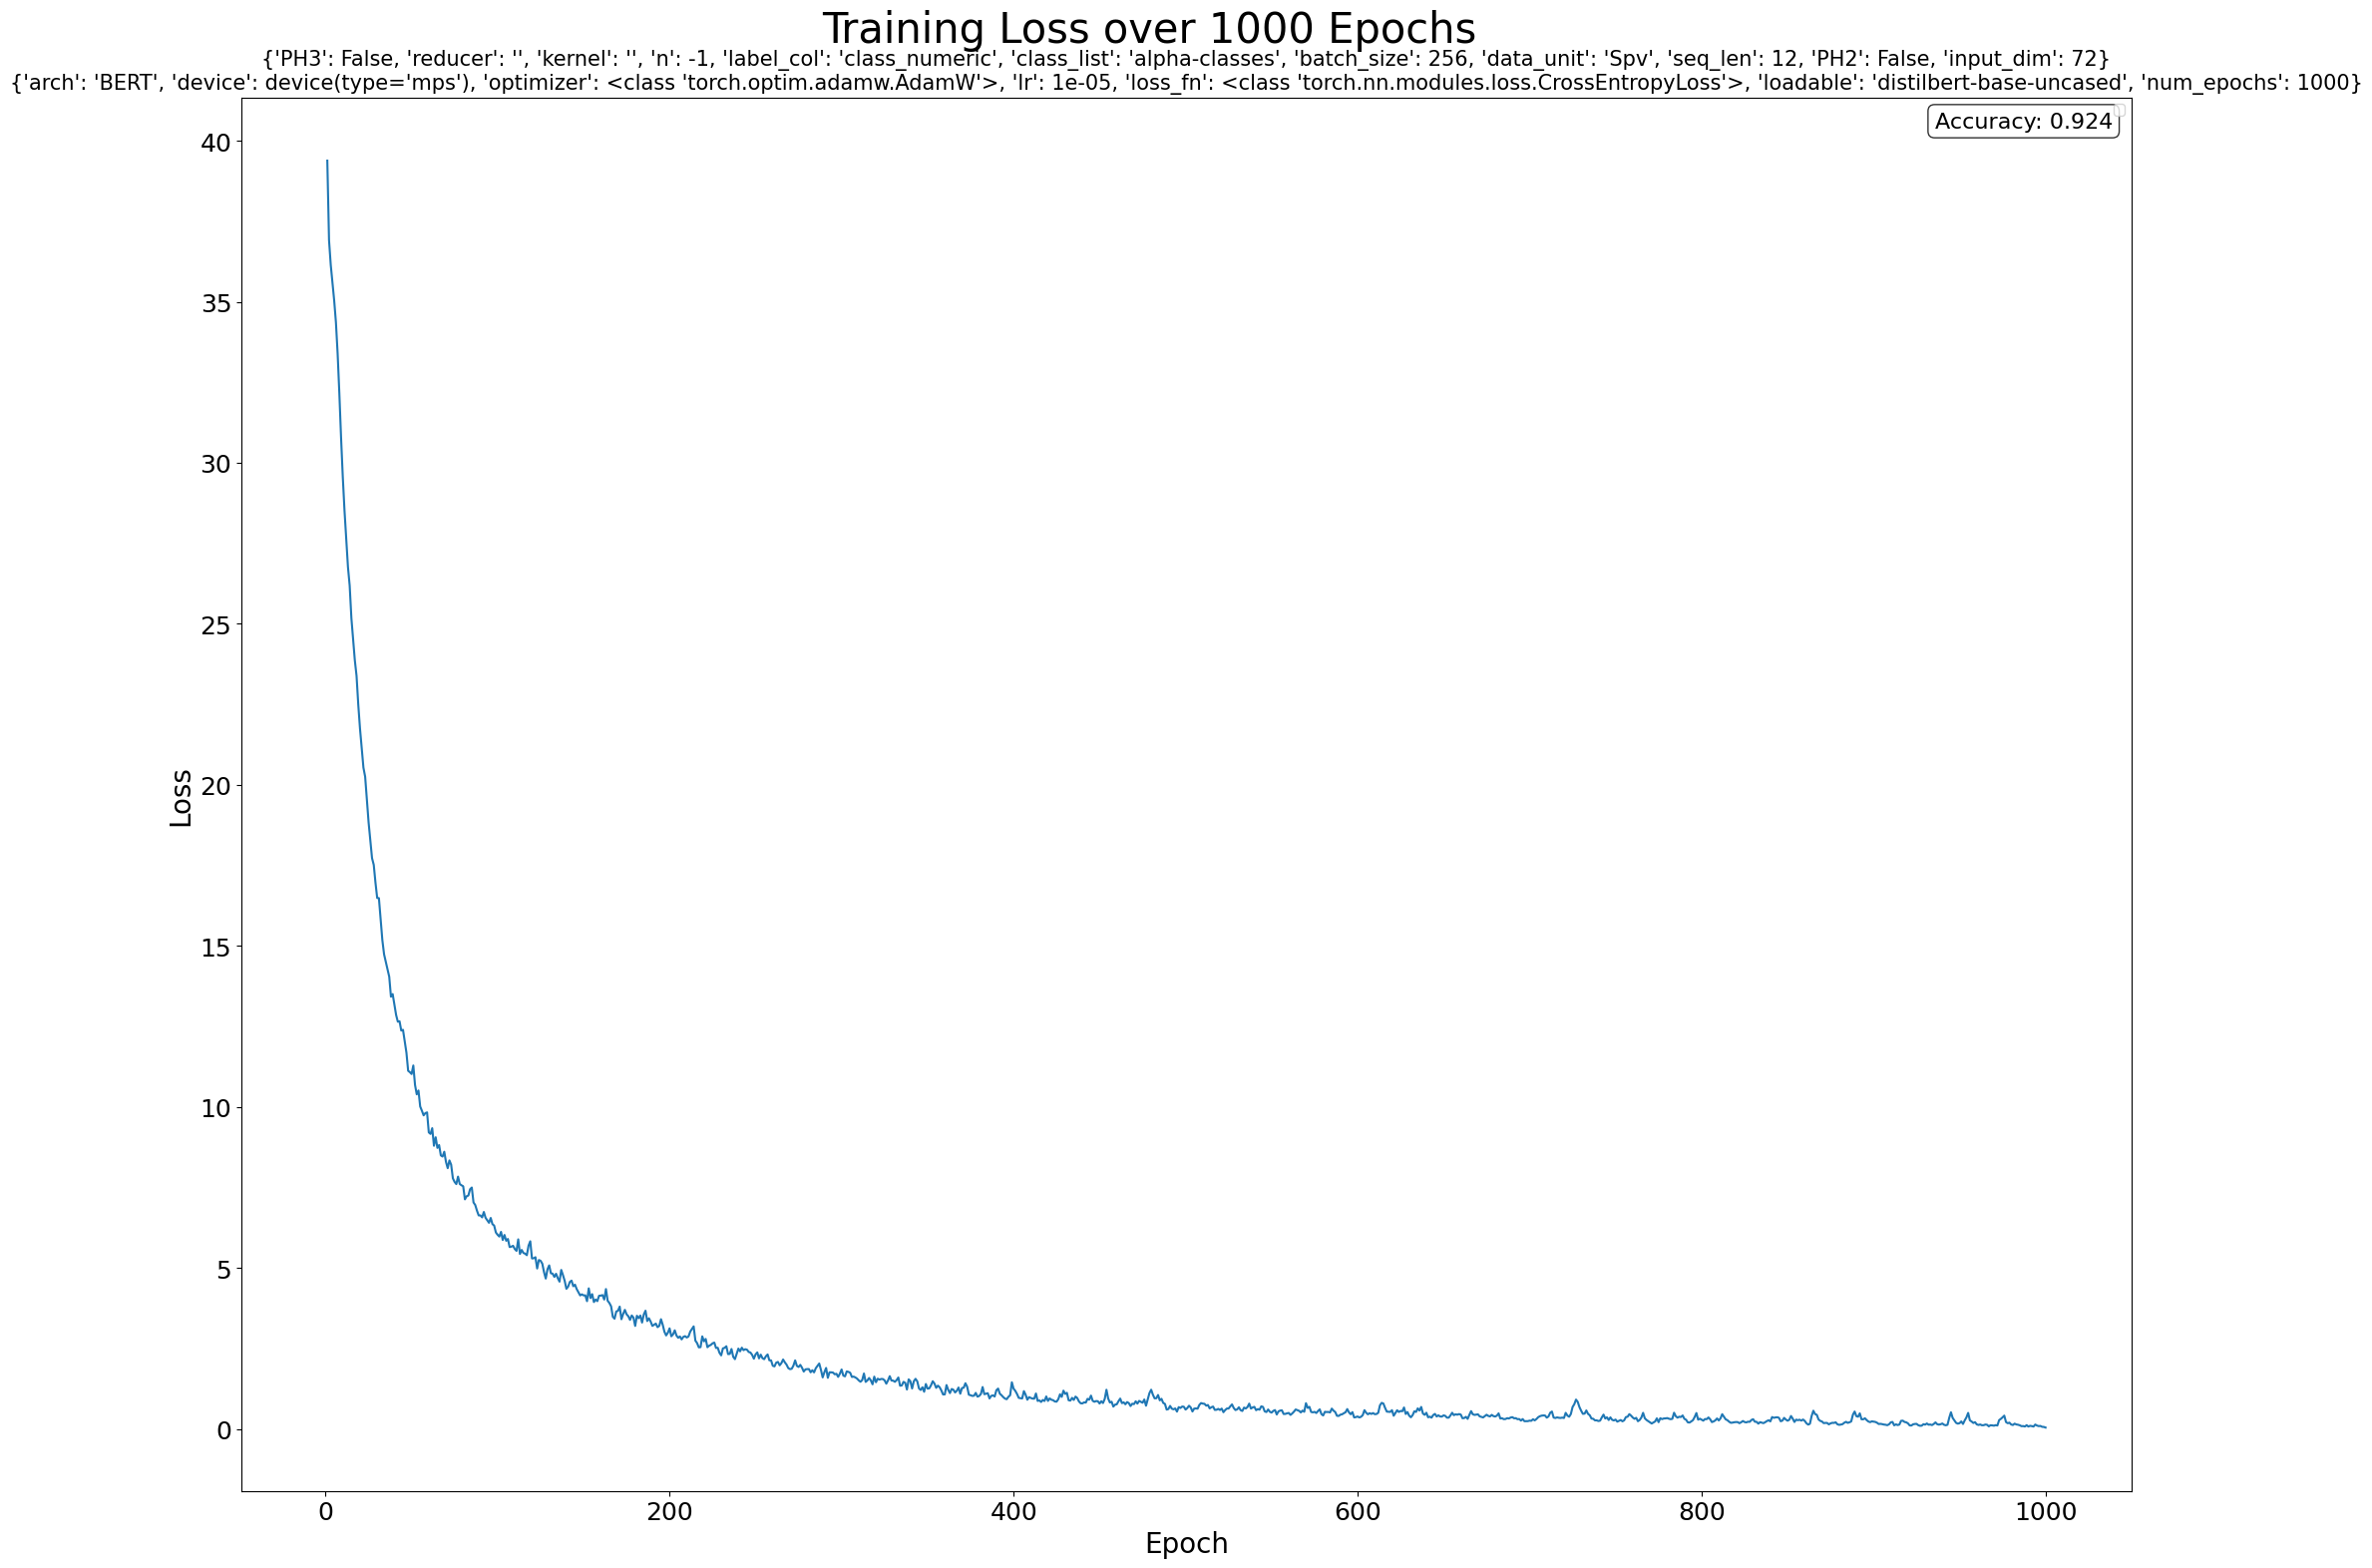

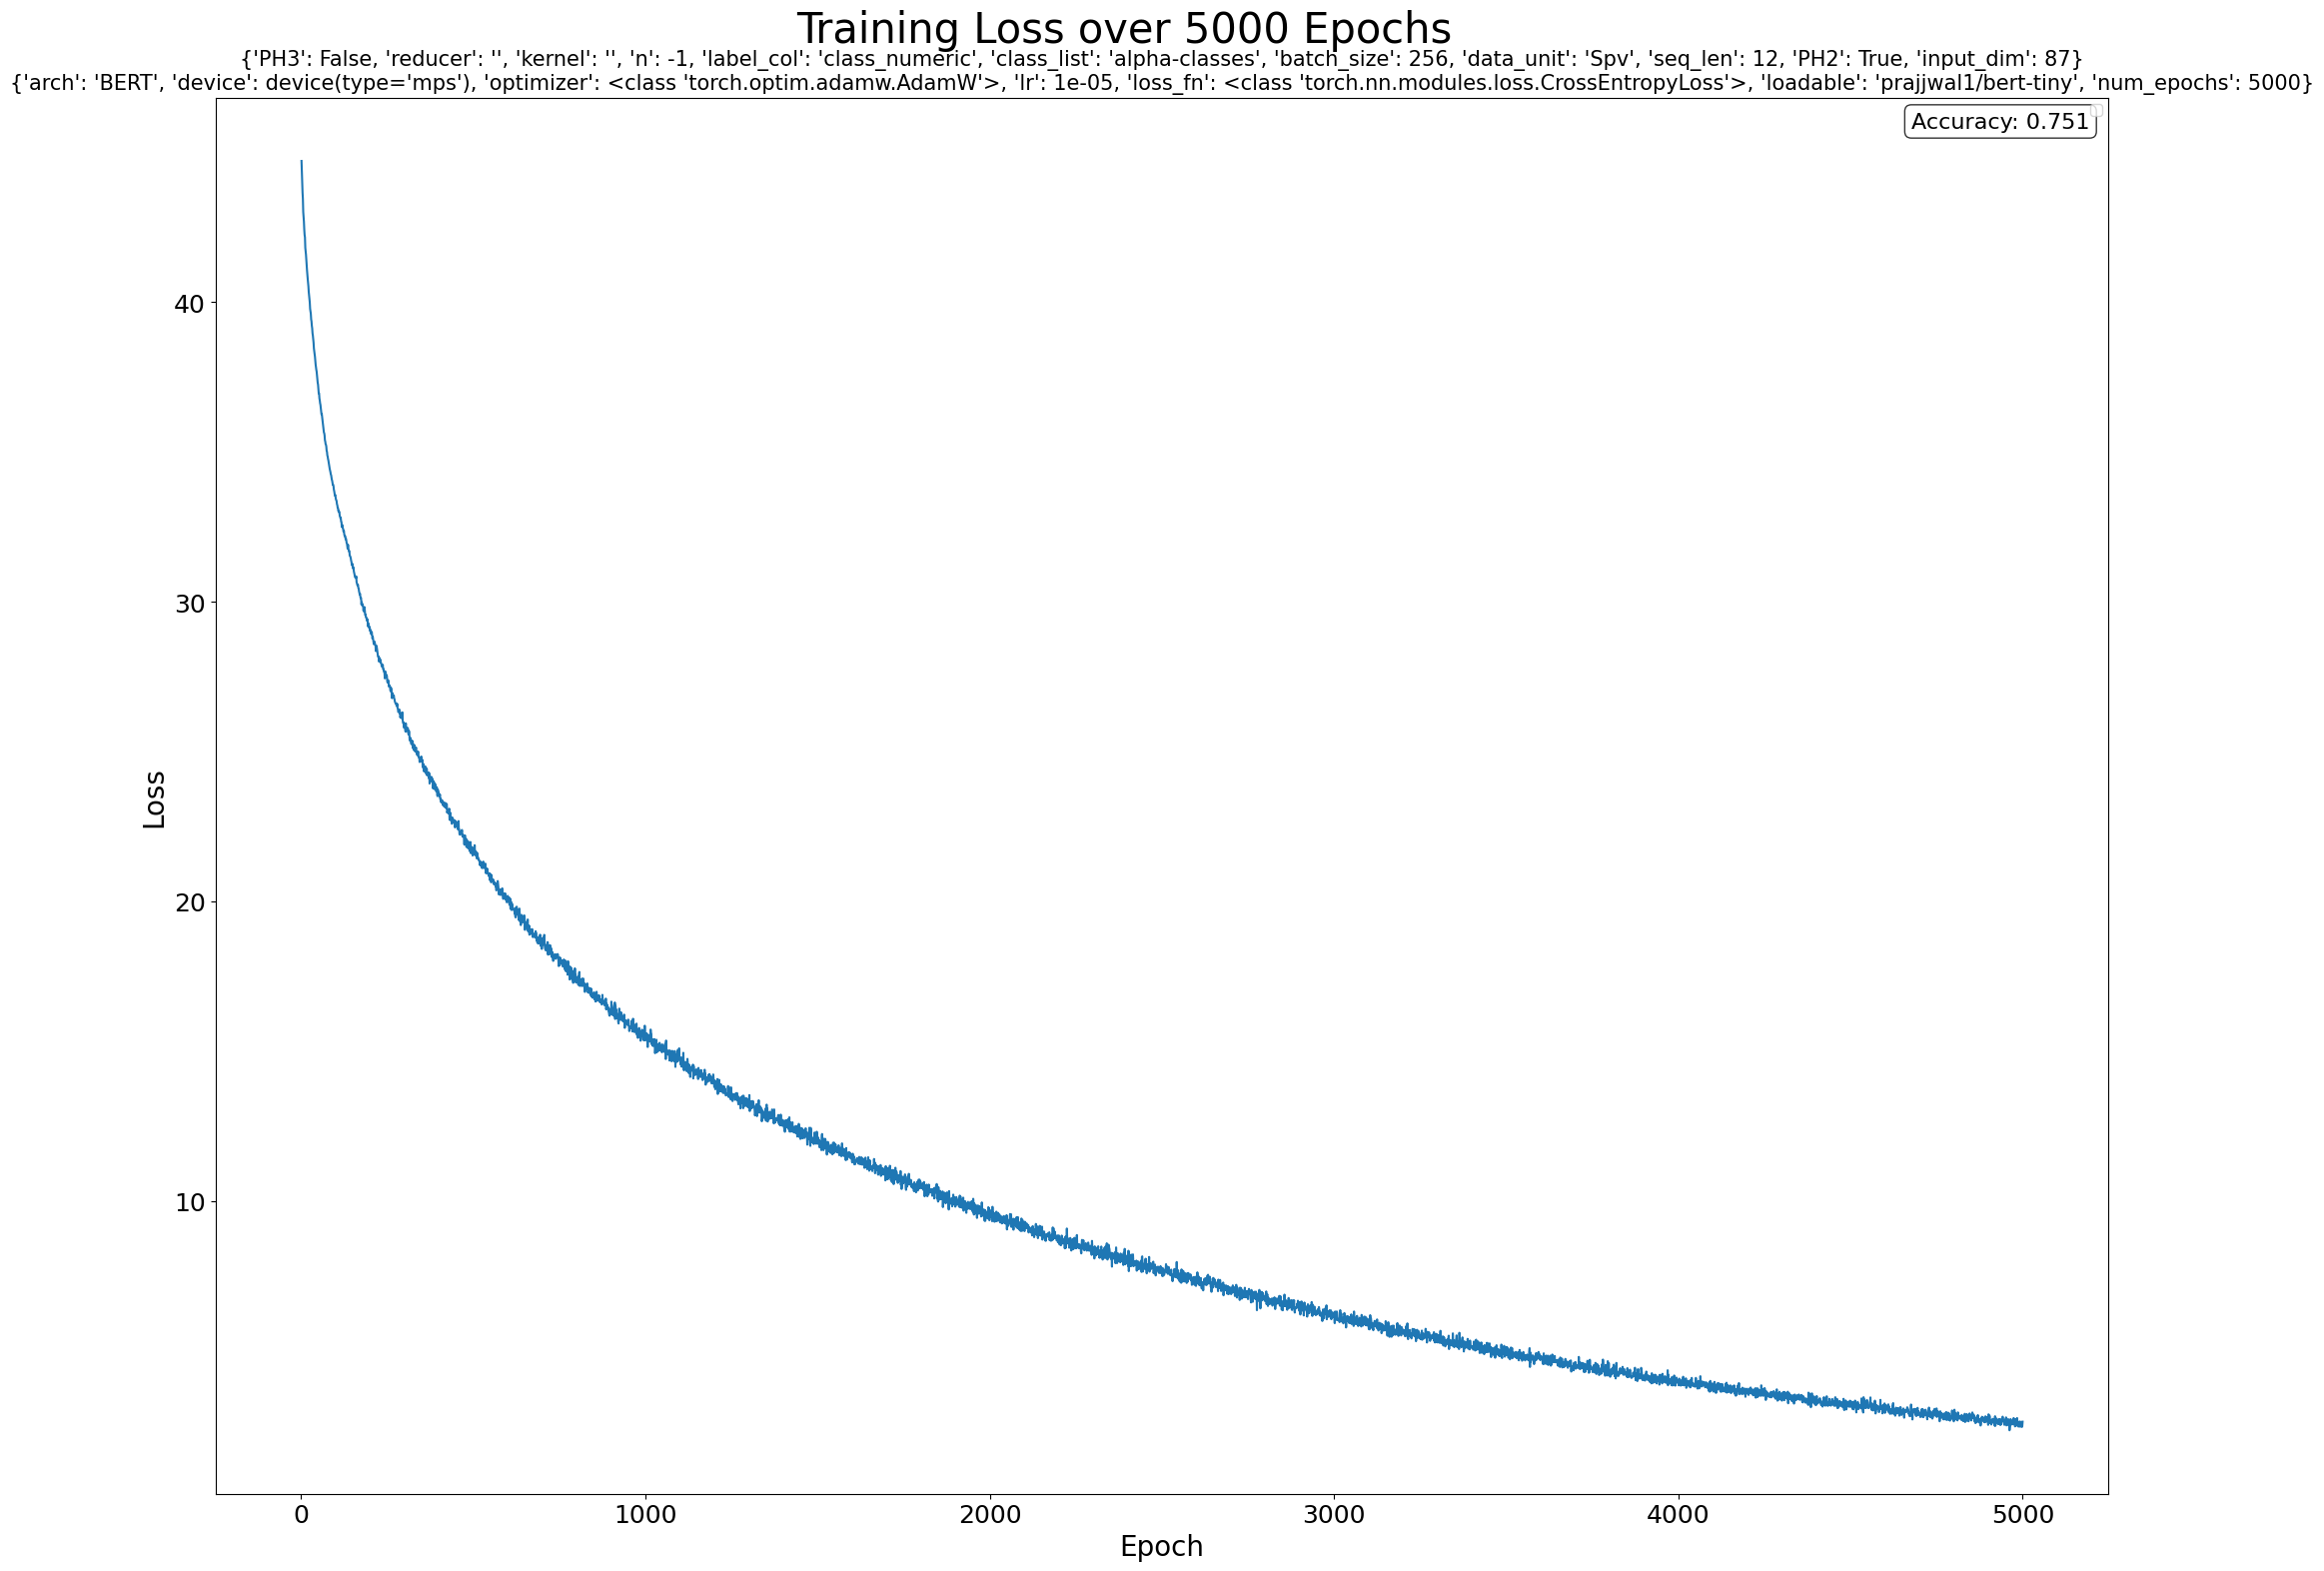

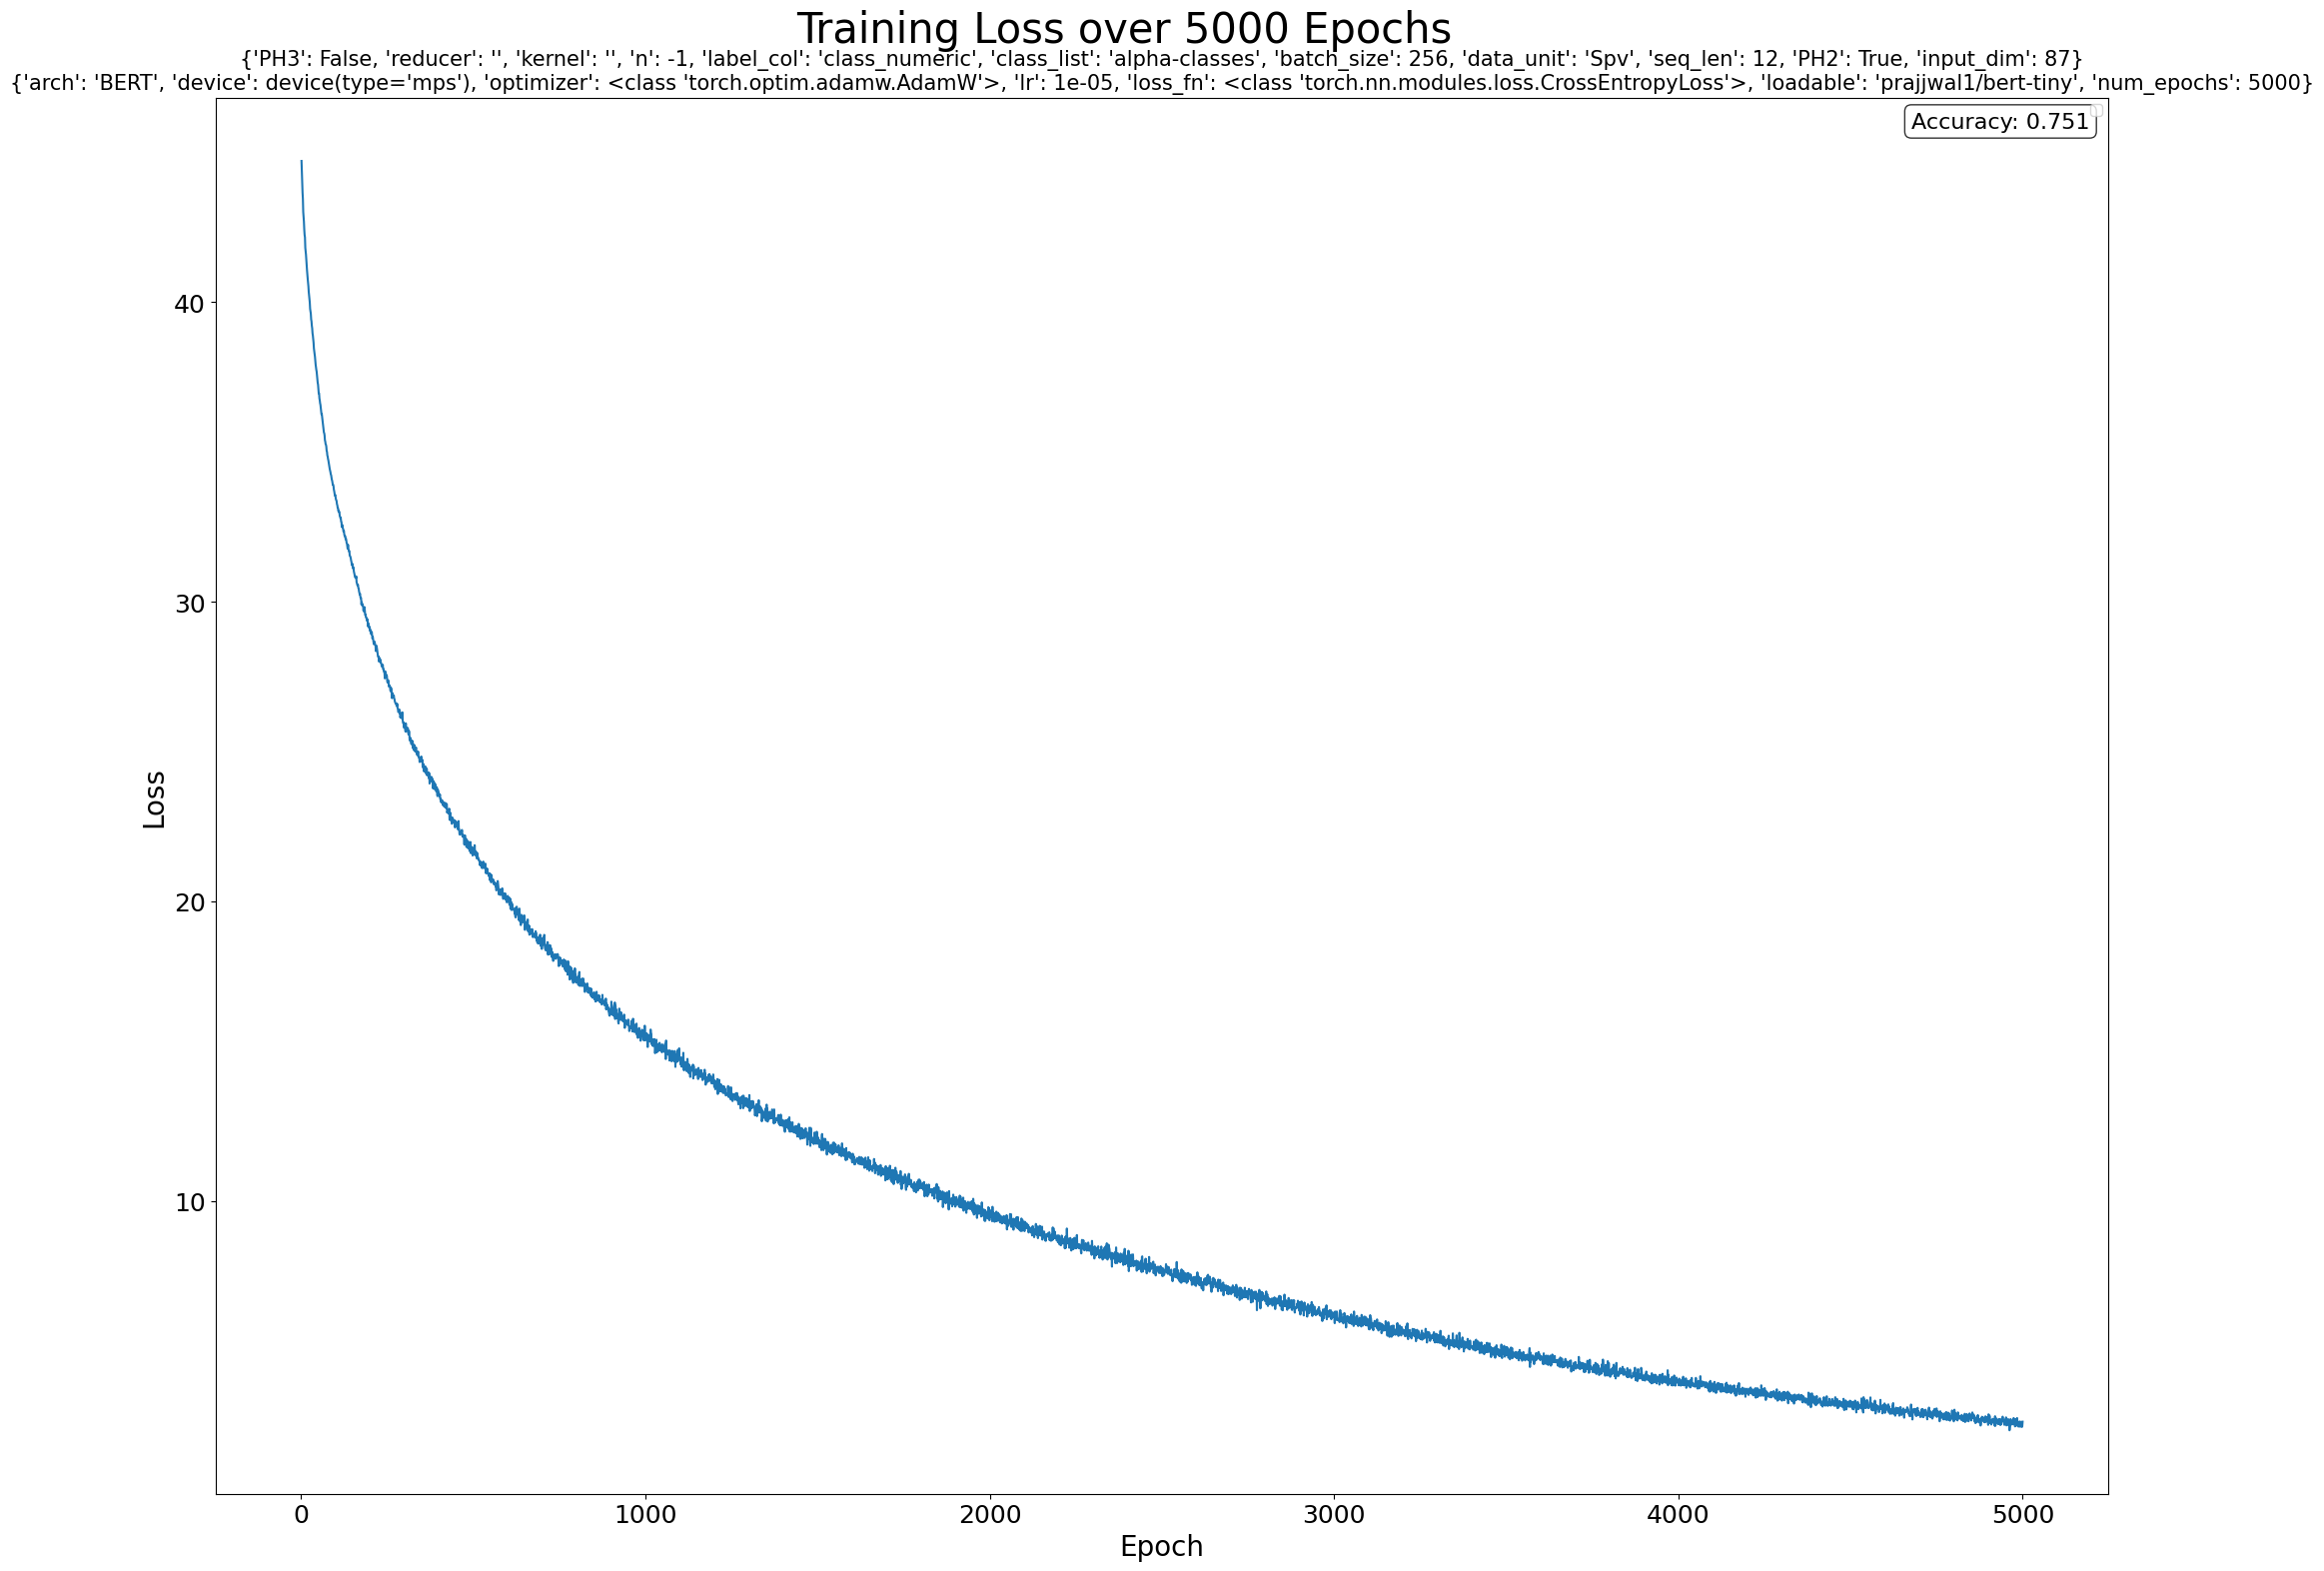

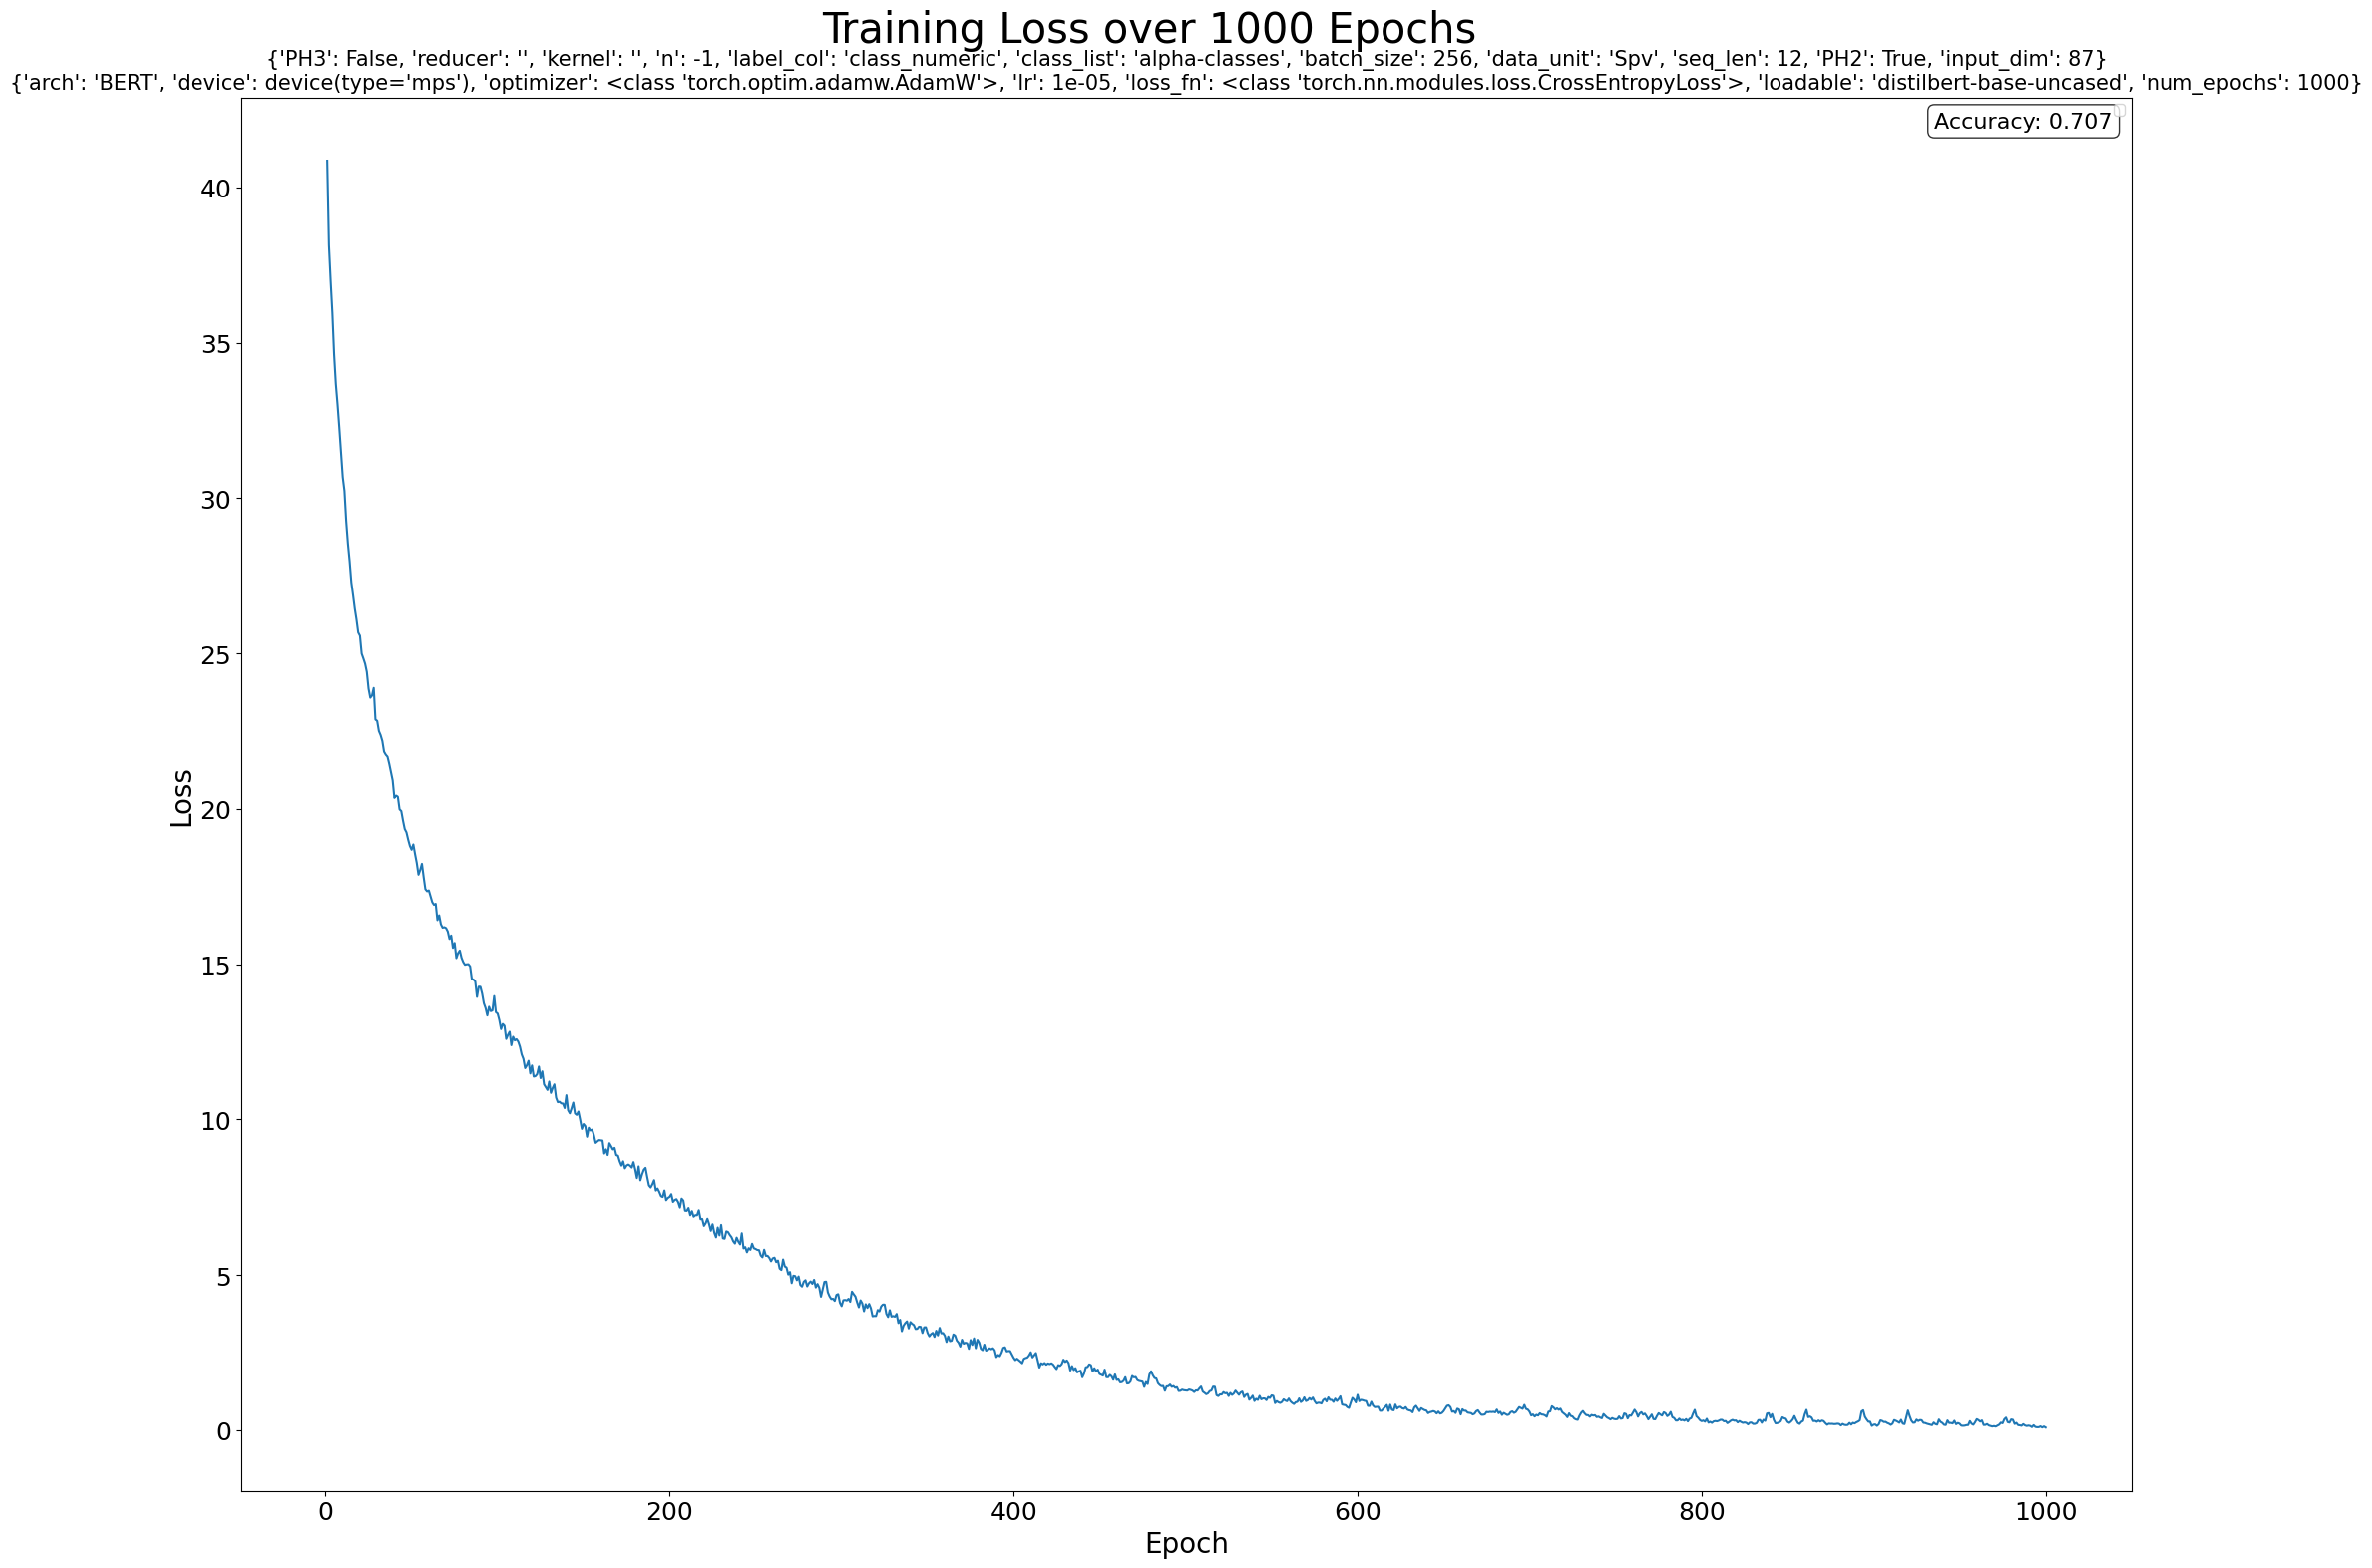

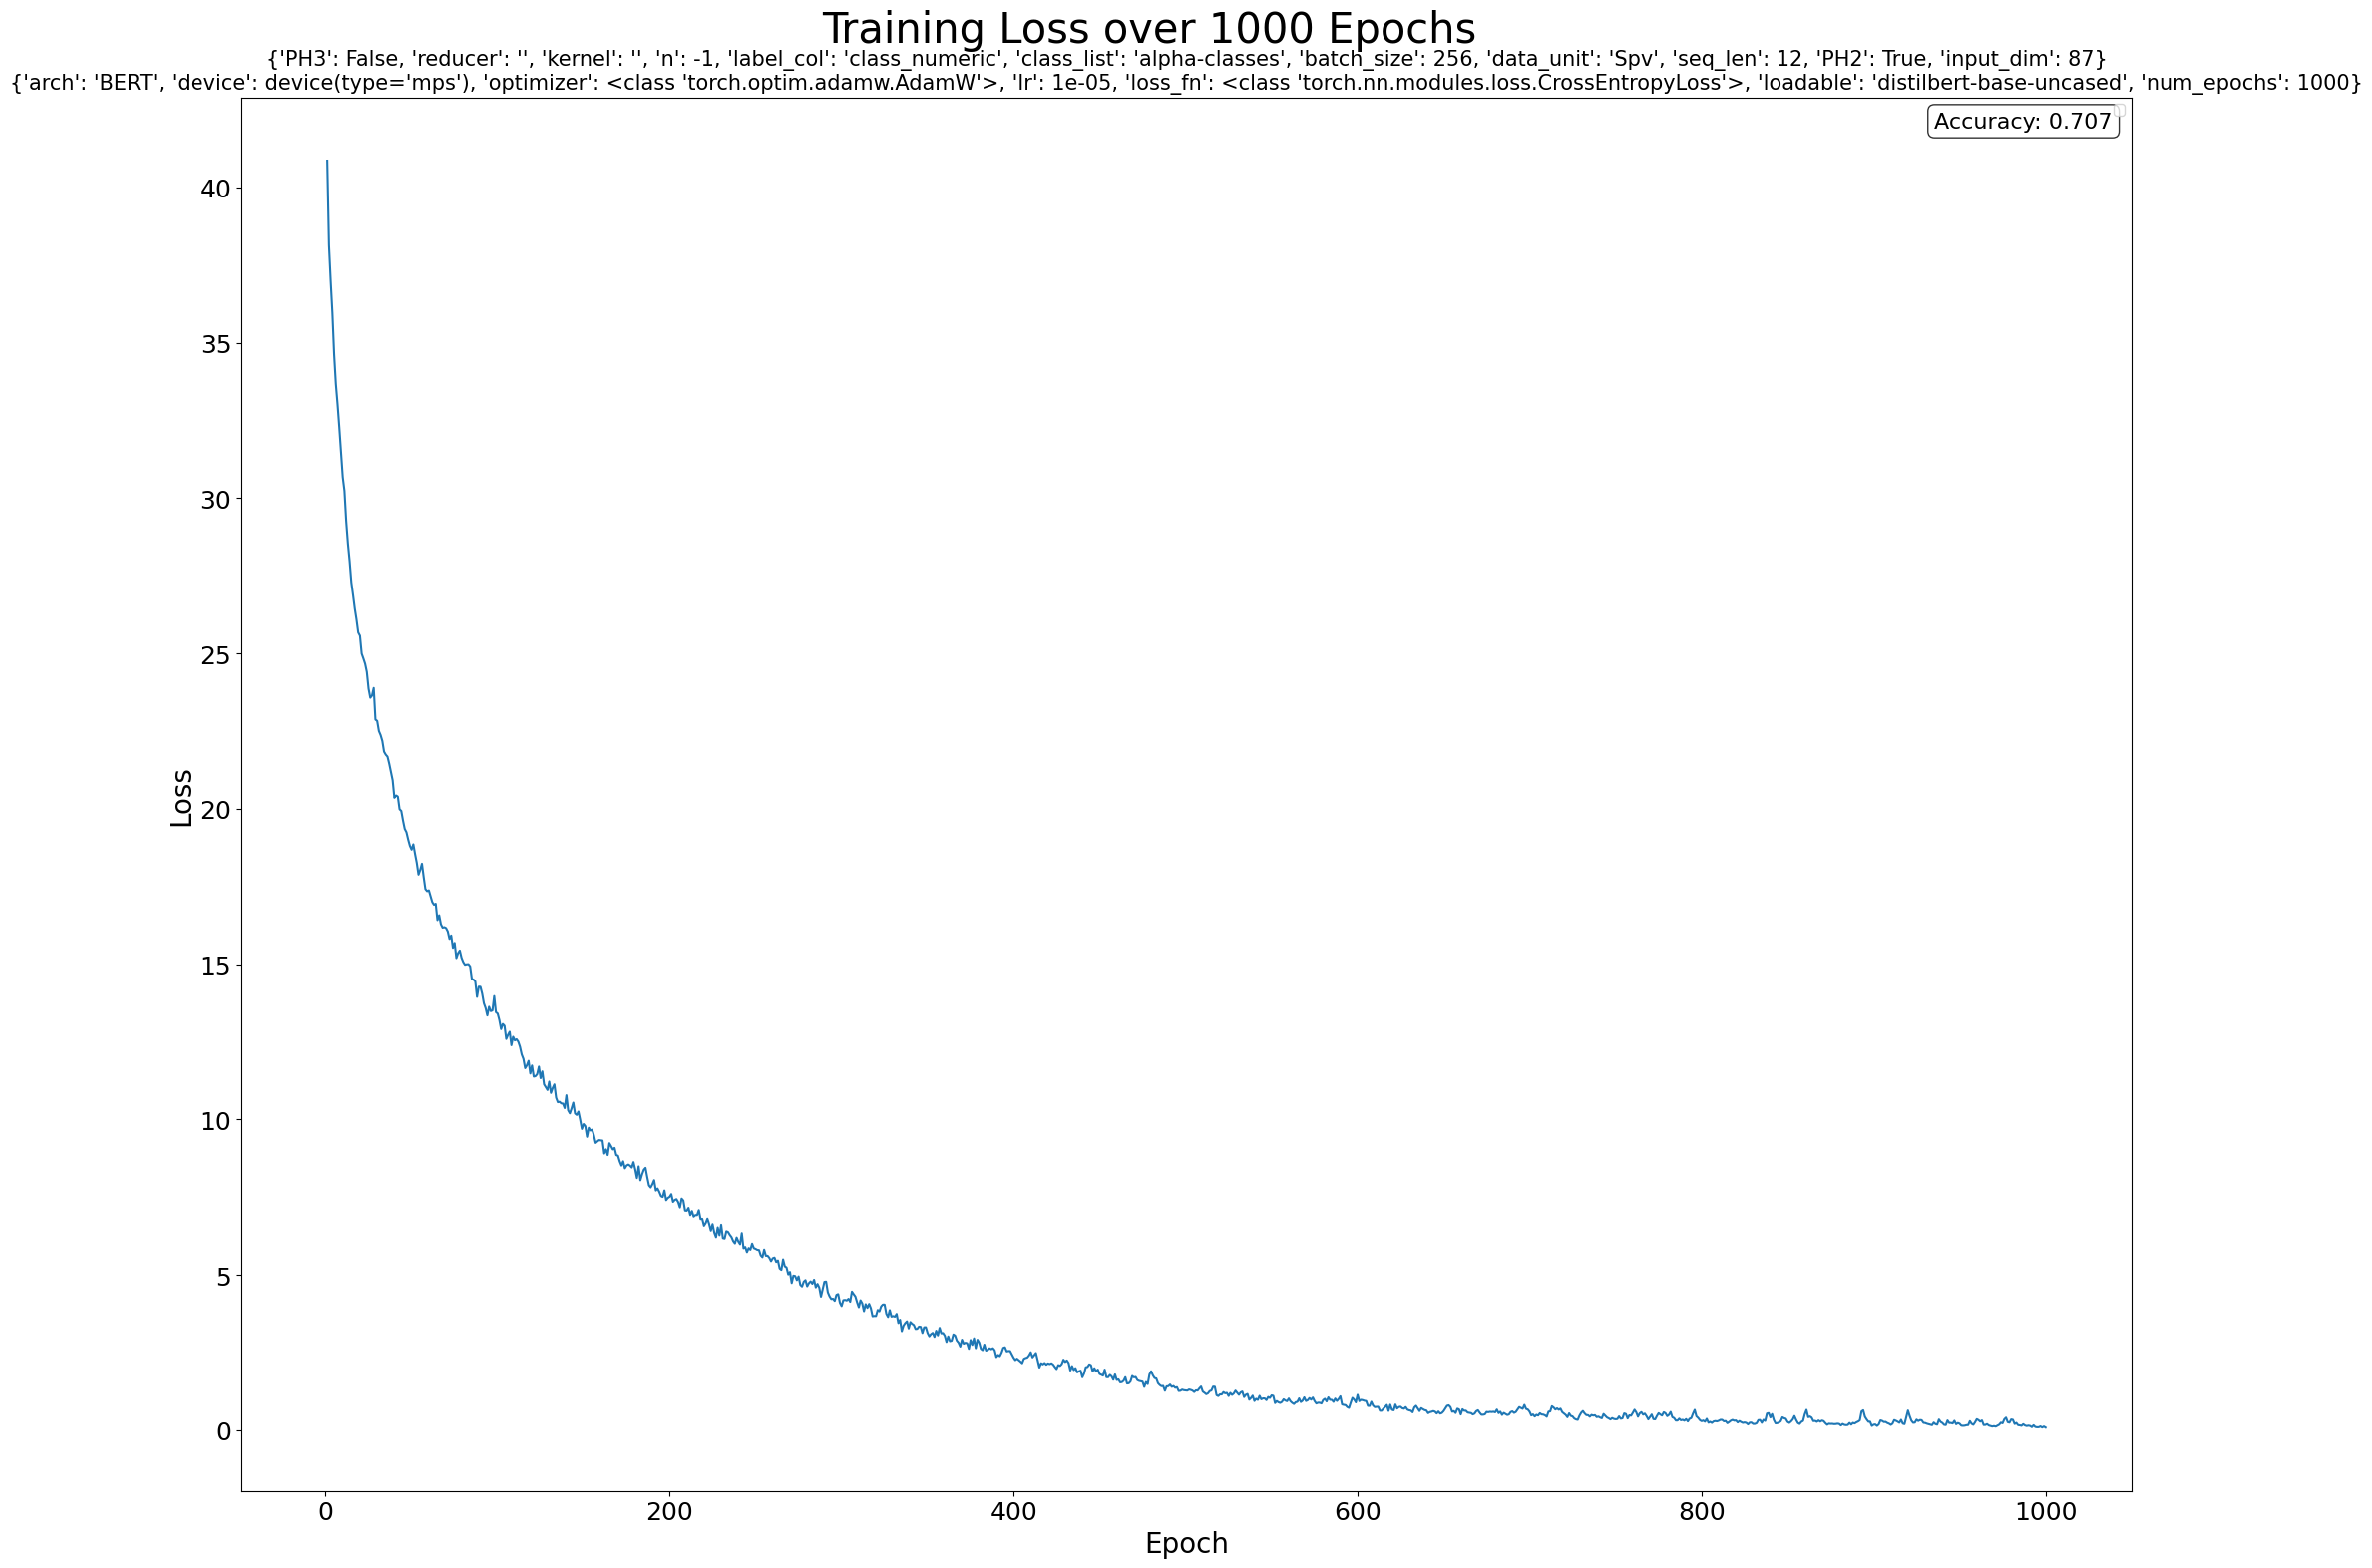

In [7]:
for data_config, train_config in configs:
  print(data_config)
  print(train_config)
  model = bert.BERT(data_config=data_config, df=None, 
                    train_config=train_config)
  
  model.fit(verbose=True)

  model.score()
  print(model.accuracy)
  model.show_loss()

  model.keep()
  bert.keep_scores_bert(model)

  print("clearing memory...")
  del model
  gc.collect()

## Keep scores

In [8]:
import pandas as pd
from datetime import datetime

In [9]:
bert_scores_df = pd.DataFrame(sup.bert_score_tracker, columns=sup.bert_scores_columns)
now = datetime.now().strftime("%Y-%m-%d_%H:%M:%S")
sup.create_dir_if_not_exists(os.path.join(sup.TRAIN_SCORES_ROOT, TRAIN_classes, 
                                          sup.TRAIN_BERT_CODE,
                                          "best"))
bert_scores_df.to_csv(os.path.join(sup.TRAIN_SCORES_ROOT, TRAIN_classes, 
                                          sup.TRAIN_BERT_CODE,
                                          "best", 
                                          f"{now}.csv"), index=False)

Directory /Users/diego/Desktop/iteso/TOG/scores/alpha-classes/BERT/best does not exist. Creating it and continuing with execution
